## Importing Libraries


In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model, metrics
from matplotlib import pyplot


In [ ]:
train = pd.read_csv("/content/Train.csv")
test = pd.read_csv("/content/Test.csv")


### Conversion to DateTime Datatype:


In [ ]:
train['InvoiceDate']= pd.to_datetime(train['InvoiceDate']) 
train.dtypes

InvoiceNo               int64
StockCode               int64
Description             int64
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                 int64
dtype: object

In [ ]:
train['month'] = train['InvoiceDate'].dt.month
train['day'] = train['InvoiceDate'].dt.day
train['year'] = train['InvoiceDate'].dt.year
train['quarter'] = train['InvoiceDate'].dt.quarter
train['day of the week'] = train['InvoiceDate'].dt.dayofweek # Monday = 0 & Sunday = 6
train['dayofweek_name'] = train['InvoiceDate'].dt.day_name()
train['is_weekend'] = np.where(train['dayofweek_name'].isin(['Sunday','Saturday']),1,0)
train["week_of_the_year"] =  train['InvoiceDate'].dt.weekofyear
train['Dayofyear'] = train['InvoiceDate'].dt.dayofyear
# train["hour"] = train['InvoiceDate'].dt.hour
# train["minute"] = train['InvoiceDate'].dt.minute
# train["minute"] = train['InvoiceDate'].dt.time





/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [ ]:
# Performing the same on test data
test['InvoiceDate']= pd.to_datetime(test['InvoiceDate']) 
test['month'] = test['InvoiceDate'].dt.month
test['day'] = test['InvoiceDate'].dt.day
test['year'] = test['InvoiceDate'].dt.year
test['quarter'] = test['InvoiceDate'].dt.quarter
test['day of the week'] = test['InvoiceDate'].dt.dayofweek # Monday = 0 & Sunday = 6
test['dayofweek_name'] = test['InvoiceDate'].dt.day_name()
test['is_weekend'] = np.where(test['dayofweek_name'].isin(['Sunday','Saturday']),1,0)
test["week_of_the_year"] =  test['InvoiceDate'].dt.weekofyear
test['Dayofyear'] = test['InvoiceDate'].dt.dayofyear
# test["hour"] = test['InvoiceDate'].dt.hour
# test["minute"] = test['InvoiceDate'].dt.minute
# test["minute"] = test['InvoiceDate'].dt.time


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
print(train.shape)
print(test.shape)

(284780, 17)
(122049, 16)


In [ ]:
train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,day,year,quarter,day of the week,dayofweek_name,is_weekend,week_of_the_year,Dayofyear
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,5,6,2011,2,4,Friday,0,18,126
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,5,11,2011,2,2,Wednesday,0,19,131
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,11,20,2011,4,6,Sunday,1,46,324
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,11,22,2011,4,1,Tuesday,0,47,326
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,5,6,2011,2,4,Friday,0,18,126


In [ ]:
train =train.drop(["dayofweek_name","InvoiceDate"],axis =1)

# EDA

In [ ]:
train.shape

(284780, 17)

In [ ]:
# train1 = train.drop(["UnitPrice"],axis=1)

In [ ]:
train.shape

(284780, 17)

In [ ]:
# country_dummies = pd.get_dummies(combo.Country, prefix='Country_')
# combo=combo.drop(["Country"],axis =1)
# # buddy_1.head()
# # concat dummy variables 
# combo = pd.concat([combo,country_dummies],axis=1)
# combo.head()


In [ ]:
# # Quantity of each stock
# train_join = train.groupby('StockCode')[['Quantity']].sum()
# train_join = train_join.reset_index()
# train_join.head()

,StockCode,Quantity
0,0,574
1,1,190
2,2,129
3,3,5
4,4,12


In [ ]:
# train = train.merge(train_join, how='left', on='StockCode')
# train = train.rename(columns={'Quantity_x' : 'Quantity', 'Quantity_y' : 'Quantity_per_Stock'})



In [ ]:
# # Total Quantity per invoice
# train_in = train.groupby('InvoiceNo')[['Quantity']].sum()
# train_in = train_in.reset_index()
# train_in.head()

,InvoiceNo,Quantity
0,0,34
1,1,6
2,2,74
3,3,15
4,4,3


In [ ]:
# train = train.merge(train_in, how='left', on='InvoiceNo')
# train = train.rename(columns={'Quantity_x' : 'Quantity', 'Quantity_y' : 'Quantity_per_invoice'})


In [ ]:
# # Unique customers per stock
# train_cust_per_stock = train.groupby(by='StockCode', as_index=False).agg({'CustomerID': pd.Series.nunique})
# train_cust_per_stock = train_cust_per_stock.rename(columns = {'CustomerID':'Unique_customers_per_stock'})
# train = train.merge(train_cust_per_stock, how='left', on='StockCode')
# train_cust_per_stock.head()

,StockCode,Unique_customers_per_stock
0,0,27.0
1,1,14.0
2,2,18.0
3,3,3.0
4,4,4.0


In [ ]:
# # Unique transactions per stock
# transactions_per_stock = train.groupby(by='StockCode', as_index=False).agg({'InvoiceNo': pd.Series.nunique})
# transactions_per_stock = transactions_per_stock.rename(columns = {'InvoiceNo':'transactions_per_stock'})
# train = train.merge(transactions_per_stock, how='left', on='StockCode')
# transactions_per_stock.head()

,StockCode,transactions_per_stock
0,0,32
1,1,14
2,2,22
3,3,3
4,4,4


In [ ]:
# Total days per stockcode (test)
total_days_per_stockcode = test.groupby('StockCode')['Dayofyear'].count()
total_days_per_stockcode = pd.DataFrame(total_days_per_stockcode)
total_days_per_stockcode = total_days_per_stockcode.rename(columns = {'Dayofyear':'total_days_per_stockcode'})
test =test.merge(total_days_per_stockcode, how='left', on='StockCode')
total_days_per_stockcode.head()

,total_days_per_stockcode
StockCode,
0,17
1,7
2,7
4,1
5,1


In [ ]:
# Total days per stockcode
total_days_per_stockcode = train.groupby('StockCode')['Dayofyear'].count()
total_days_per_stockcode = pd.DataFrame(total_days_per_stockcode)
total_days_per_stockcode = total_days_per_stockcode.rename(columns = {'Dayofyear':'total_days_per_stockcode'})
train = train.merge(total_days_per_stockcode, how='left', on='StockCode')
total_days_per_stockcode.head()

,total_days_per_stockcode
StockCode,
0,32
1,14
2,23
3,3
4,4


In [ ]:
# Unique days per stockcode
Unique_days_per_stockcode = train.groupby(by='StockCode', as_index=False).agg({'Dayofyear': pd.Series.nunique})
Unique_days_per_stockcode = Unique_days_per_stockcode.rename(columns = {'Dayofyear':'Unique_days_per_stockcode'})
train = train.merge(Unique_days_per_stockcode, how='left', on='StockCode')
Unique_days_per_stockcode.head()

,StockCode,Unique_days_per_stockcode
0,0,29
1,1,14
2,2,20
3,3,3
4,4,4


In [ ]:
# Unique weeks per stockcode
Unique_weeks_per_stockcode = train.groupby(by='StockCode', as_index=False).agg({'week_of_the_year': pd.Series.nunique})
Unique_weeks_per_stockcode = Unique_weeks_per_stockcode.rename(columns = {'week_of_the_year':'Unique_weeks_per_stockcode'})
train = train.merge(Unique_weeks_per_stockcode, how='left', on='StockCode')
Unique_weeks_per_stockcode.head()

,StockCode,Unique_weeks_per_stockcode
0,0,15
1,1,12
2,2,15
3,3,3
4,4,4


In [ ]:
# Unique transactions per customer
transactions_per_customer = train.groupby(by='CustomerID', as_index=False).agg({'InvoiceNo': pd.Series.nunique})
transactions_per_customer = transactions_per_customer.rename(columns = {'InvoiceNo':'transactions_per_customer'})
train = train.merge(transactions_per_customer, how='left', on='CustomerID')
transactions_per_customer.head()


,CustomerID,transactions_per_customer
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [ ]:
# Unique transactions per customer (test)
transactions_per_customer = test.groupby(by='CustomerID', as_index=False).agg({'InvoiceNo': pd.Series.nunique})
transactions_per_customer = transactions_per_customer.rename(columns = {'InvoiceNo':'transactions_per_customer'})
test = test.merge(transactions_per_customer, how='left', on='CustomerID')
transactions_per_customer.head()


,CustomerID,transactions_per_customer
0,12347.0,7
1,12348.0,4
2,12349.0,1
3,12350.0,1
4,12352.0,9


In [ ]:
# Unique stocks per customer
stocks_per_customer = train.groupby(by='CustomerID', as_index=False).agg({'StockCode': pd.Series.nunique})
stocks_per_customer = stocks_per_customer.rename(columns = {'StockCode':'stocks_per_customer'})
train = train.merge(stocks_per_customer, how='left', on='CustomerID')
stocks_per_customer.head()

,CustomerID,stocks_per_customer
0,12346.0,1
1,12347.0,86
2,12348.0,17
3,12349.0,53
4,12350.0,11


In [ ]:
# Unique stocks per customer (test)
stocks_per_customer = test.groupby(by='CustomerID', as_index=False).agg({'StockCode': pd.Series.nunique})
stocks_per_customer = stocks_per_customer.rename(columns = {'StockCode':'stocks_per_customer'})
test = test.merge(stocks_per_customer, how='left', on='CustomerID')
stocks_per_customer.head()

,CustomerID,stocks_per_customer
0,12347.0,45
1,12348.0,7
2,12349.0,20
3,12350.0,6
4,12352.0,25


In [ ]:
# Total Quantity per customer
quantity_per_customer = train.groupby('CustomerID')[['Quantity']].sum()
quantity_per_customer = quantity_per_customer.reset_index()
train = train.merge(quantity_per_customer, how='left', on='CustomerID')
train = train.rename(columns={'Quantity_x' : 'Quantity', 'Quantity_y' : 'quantity_per_customer'})
quantity_per_customer.head()


,CustomerID,Quantity
0,12346.0,0
1,12347.0,1756
2,12348.0,1517
3,12349.0,512
4,12350.0,125


In [ ]:
# Total Quantity per customer(test)
quantity_per_customer = test.groupby('CustomerID')[['Quantity']].sum()
quantity_per_customer = quantity_per_customer.reset_index()
test = test.merge(quantity_per_customer, how='left', on='CustomerID')
test = test.rename(columns={'Quantity_x' : 'Quantity', 'Quantity_y' : 'quantity_per_customer'})
quantity_per_customer.head()


,CustomerID,Quantity
0,12347.0,702
1,12348.0,824
2,12349.0,119
3,12350.0,72
4,12352.0,160


In [ ]:
# # Total Number of stocks per customer
# total_stocks_per_customer = train.groupby('CustomerID')['StockCode'].count()
# total_stocks_per_customer = pd.DataFrame(total_stocks_per_customer)
# total_stocks_per_customer = total_stocks_per_customer.rename(columns = {'StockCode':'total_stocks_per_customer'})
# train = train.merge(total_stocks_per_customer, how='left', on='CustomerID')
# total_stocks_per_customer.head()




,total_stocks_per_customer
CustomerID,
12346.0,2
12347.0,132
12348.0,22
12349.0,53
12350.0,11


In [ ]:
# Total transactions per customer
total_transactions_per_customer = train.groupby('CustomerID')['InvoiceNo'].count()
total_transactions_per_customer = pd.DataFrame(total_transactions_per_customer)
total_transactions_per_customer = total_transactions_per_customer.rename(columns = {'InvoiceNo':'total_transactions_per_customer'})
train = train.merge(total_transactions_per_customer, how='left', on='CustomerID')
total_transactions_per_customer.head()




,total_transactions_per_customer
CustomerID,
12346.0,2
12347.0,132
12348.0,22
12349.0,53
12350.0,11


In [ ]:
# Total transactions per customer (test)
total_transactions_per_customer = test.groupby('CustomerID')['InvoiceNo'].count()
total_transactions_per_customer = pd.DataFrame(total_transactions_per_customer)
total_transactions_per_customer = total_transactions_per_customer.rename(columns = {'InvoiceNo':'total_transactions_per_customer'})
test = test.merge(total_transactions_per_customer, how='left', on='CustomerID')
total_transactions_per_customer.head()


,total_transactions_per_customer
CustomerID,
12347.0,50
12348.0,9
12349.0,20
12350.0,6
12352.0,26


In [ ]:
# # # Total days a unique customer shops
# total_days_per_customer = train.groupby('CustomerID')['day of the week'].count()
# total_days_per_customer = pd.DataFrame(total_days_per_customer)
# total_days_per_customer = total_days_per_customer.rename(columns = {'day of the week':'total_days_per_customer'})
# train = train.merge(total_days_per_customer, how='left', on='CustomerID')
# total_days_per_customer.head()

,total_days_per_customer
CustomerID,
12346.0,2
12347.0,132
12348.0,22
12349.0,53
12350.0,11


In [ ]:
train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,day,year,quarter,day of the week,dayofweek_name,is_weekend,week_of_the_year,Dayofyear,total_days_per_stockcode,transactions_per_customer,stocks_per_customer,quantity_per_customer,total_transactions_per_customer
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,5,6,2011,2,4,Friday,0,18,126,331,28,301,2970,791
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,5,11,2011,2,2,Wednesday,0,19,131,194,38,146,9960,394
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,11,20,2011,4,6,Sunday,1,46,324,317,20,170,1787,307
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,11,22,2011,4,1,Tuesday,0,47,326,328,4,105,323,128
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,5,6,2011,2,4,Friday,0,18,126,114,2,86,1042,95


In [ ]:
# Total weeks per customer
total_weeks_per_customer = train.groupby('CustomerID')['week_of_the_year'].count()
total_weeks_per_customer = pd.DataFrame(total_weeks_per_customer)
total_weeks_per_customer = total_weeks_per_customer.rename(columns = {'week_of_the_year':'total_weeks_per_customer'})
train = train.merge(total_weeks_per_customer, how='left', on='CustomerID')
total_weeks_per_customer.head()


,total_weeks_per_customer
CustomerID,
12346.0,2
12347.0,132
12348.0,22
12349.0,53
12350.0,11


In [ ]:
# Total weeks per customer (test)
total_weeks_per_customer = test.groupby('CustomerID')['week_of_the_year'].count()
total_weeks_per_customer = pd.DataFrame(total_weeks_per_customer)
total_weeks_per_customer = total_weeks_per_customer.rename(columns = {'week_of_the_year':'total_weeks_per_customer'})
test = test.merge(total_weeks_per_customer, how='left', on='CustomerID')
total_weeks_per_customer.head()

,total_weeks_per_customer
CustomerID,
12347.0,50
12348.0,9
12349.0,20
12350.0,6
12352.0,26


In [ ]:
# test.head()

In [ ]:
# Unique weeks per customer
Unique_weeks_per_customer = train.groupby(by='CustomerID', as_index=False).agg({'week_of_the_year': pd.Series.nunique})
Unique_weeks_per_customer = Unique_weeks_per_customer.rename(columns = {'week_of_the_year':'Unique_weeks_per_customer'})
train = train.merge(Unique_weeks_per_customer, how='left', on='CustomerID')
Unique_weeks_per_customer.head()

,CustomerID,Unique_weeks_per_customer
0,12346.0,1
1,12347.0,6
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [ ]:
# Unique weeks per customer (test)
Unique_weeks_per_customer = test.groupby(by='CustomerID', as_index=False).agg({'week_of_the_year': pd.Series.nunique})
Unique_weeks_per_customer = Unique_weeks_per_customer.rename(columns = {'week_of_the_year':'Unique_weeks_per_customer'})
test = test.merge(Unique_weeks_per_customer, how='left', on='CustomerID')
Unique_weeks_per_customer.head()

,CustomerID,Unique_weeks_per_customer
0,12347.0,6
1,12348.0,4
2,12349.0,1
3,12350.0,1
4,12352.0,7


In [ ]:
# Unique days per customer
Unique_days_per_customer = train.groupby(by='CustomerID', as_index=False).agg({'Dayofyear': pd.Series.nunique})
Unique_days_per_customer = Unique_days_per_customer.rename(columns = {'Dayofyear':'Unique_days_per_customer'})
train = train.merge(Unique_days_per_customer, how='left', on='CustomerID')
Unique_days_per_customer.head()

,CustomerID,Unique_days_per_customer
0,12346.0,1
1,12347.0,6
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [ ]:
# Unique days per customer (test)
Unique_days_per_customer = test.groupby(by='CustomerID', as_index=False).agg({'Dayofyear': pd.Series.nunique})
Unique_days_per_customer = Unique_days_per_customer.rename(columns = {'Dayofyear':'Unique_days_per_customer'})
test = test.merge(Unique_days_per_customer, how='left', on='CustomerID')
Unique_days_per_customer.head()

,CustomerID,Unique_days_per_customer
0,12347.0,6
1,12348.0,4
2,12349.0,1
3,12350.0,1
4,12352.0,7


In [ ]:
# Total days per customer
total_days_per_customer = train.groupby('CustomerID')['Dayofyear'].count()
total_days_per_customer = pd.DataFrame(total_days_per_customer)
total_days_per_customer = total_days_per_customer.rename(columns = {'Dayofyear':'total_days_per_customer'})
train = train.merge(total_days_per_customer, how='left', on='CustomerID')
total_days_per_customer.head()

,total_days_per_customer
CustomerID,
12346.0,2
12347.0,132
12348.0,22
12349.0,53
12350.0,11


In [ ]:
# Total days per customer (test)
total_days_per_customer = test.groupby('CustomerID')['Dayofyear'].count()
total_days_per_customer = pd.DataFrame(total_days_per_customer)
total_days_per_customer = total_days_per_customer.rename(columns = {'Dayofyear':'total_days_per_customer'})
test = test.merge(total_days_per_customer, how='left', on='CustomerID')
total_days_per_customer.head()

,total_days_per_customer
CustomerID,
12347.0,50
12348.0,9
12349.0,20
12350.0,6
12352.0,26


In [ ]:
print(train.shape)
print(test.shape)

(284780, 24)
(122049, 23)


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122049 entries, 0 to 122048
Data columns (total 23 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   InvoiceNo                        122049 non-null  int64         
 1   StockCode                        122049 non-null  int64         
 2   Description                      122049 non-null  int64         
 3   Quantity                         122049 non-null  int64         
 4   InvoiceDate                      122049 non-null  datetime64[ns]
 5   CustomerID                       122049 non-null  float64       
 6   Country                          122049 non-null  int64         
 7   month                            122049 non-null  int64         
 8   day                              122049 non-null  int64         
 9   year                             122049 non-null  int64         
 10  quarter                          122049 non-

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284780 entries, 0 to 284779
Data columns (total 26 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   InvoiceNo                        284780 non-null  int64         
 1   StockCode                        284780 non-null  int64         
 2   Description                      284780 non-null  int64         
 3   Quantity                         284780 non-null  int64         
 4   InvoiceDate                      284780 non-null  datetime64[ns]
 5   UnitPrice                        284780 non-null  float64       
 6   CustomerID                       284780 non-null  float64       
 7   Country                          284780 non-null  int64         
 8   month                            284780 non-null  int64         
 9   day                              284780 non-null  int64         
 10  year                             284780 non-

In [ ]:
train = train.drop(["Unique_weeks_per_stockcode" ,"Unique_days_per_stockcode"],axis =1)

In [ ]:
# train.loc[train.quantity_per_customer == 0]

In [ ]:
train.shape

(284780, 25)

In [ ]:
test.shape

(122049, 24)

In [ ]:
train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,day,year,quarter,day of the week,dayofweek_name,is_weekend,week_of_the_year,Dayofyear,total_days_per_stockcode,transactions_per_customer,stocks_per_customer,quantity_per_customer,total_transactions_per_customer_x,total_transactions_per_customer_y,total_weeks_per_customer,Unique_weeks_per_customer,Unique_days_per_customer,total_days_per_customer
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,5,6,2011,2,4,Friday,0,18,126,331,28,301,2970,791,791,791,22,24,791
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,5,11,2011,2,2,Wednesday,0,19,131,194,38,146,9960,394,394,394,25,33,394
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,11,20,2011,4,6,Sunday,1,46,324,317,20,170,1787,307,307,307,15,15,307
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,11,22,2011,4,1,Tuesday,0,47,326,328,4,105,323,128,128,128,3,3,128
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,5,6,2011,2,4,Friday,0,18,126,114,2,86,1042,95,95,95,2,2,95


In [ ]:
train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,day,year,quarter,day of the week,dayofweek_name,is_weekend,week_of_the_year,Dayofyear,total_days_per_stockcode,transactions_per_customer,stocks_per_customer,quantity_per_customer,total_transactions_per_customer,Unique_weeks_per_customer,Unique_days_per_customer
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,5,6,2011,2,4,Friday,0,18,126,331,28,301,2970,791,22,24
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,5,11,2011,2,2,Wednesday,0,19,131,194,38,146,9960,394,25,33
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,11,20,2011,4,6,Sunday,1,46,324,317,20,170,1787,307,15,15
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,11,22,2011,4,1,Tuesday,0,47,326,328,4,105,323,128,3,3
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,5,6,2011,2,4,Friday,0,18,126,114,2,86,1042,95,2,2


In [ ]:
test.loc[test.quantity_per_customer == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country,month,day,year,quarter,day of the week,dayofweek_name,is_weekend,week_of_the_year,Dayofyear,total_days_per_stockcode,transactions_per_customer,stocks_per_customer,quantity_per_customer,total_transactions_per_customer,Unique_weeks_per_customer,Unique_days_per_customer,35,quantity_returned
2319,10028,3118,2994,2,2011-07-28 19:13:00,18268.0,35,7,28,2011,3,3,Thursday,0,30,209,17,2,1,0,2,1,1,1,1
36185,20675,3118,2994,-2,2011-07-28 11:16:00,18268.0,35,7,28,2011,3,3,Thursday,0,30,209,17,2,1,0,2,1,1,1,1


In [ ]:
y.shape

(284780,)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284780 entries, 0 to 284779
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   InvoiceNo                        284780 non-null  int64         
 1   StockCode                        284780 non-null  int64         
 2   Description                      284780 non-null  int64         
 3   Quantity                         284780 non-null  int64         
 4   InvoiceDate                      284780 non-null  datetime64[ns]
 5   UnitPrice                        284780 non-null  float64       
 6   CustomerID                       284780 non-null  float64       
 7   Country                          284780 non-null  int64         
 8   month                            284780 non-null  int64         
 9   day                              284780 non-null  int64         
 10  year                             284780 non-

In [ ]:
# Checking if any null values are present 
train.isnull().values.any()

False

In [ ]:
print(train.StockCode.nunique())
print(train.Description.nunique())

3619
3819


In [ ]:
# StockCodes have multiple descriptions
train.groupby("StockCode").Description.nunique().sort_values(ascending=False)

StockCode
2030    4
2070    4
2188    3
2209    3
1966    3
       ..
2455    1
2454    1
2453    1
2452    1
0       1
Name: Description, Length: 3619, dtype: int64

In [ ]:
# Number Of Customers 
train.CustomerID.nunique()

4339

In [ ]:
# Number Of Unique Countries
train.Country.nunique()


37

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


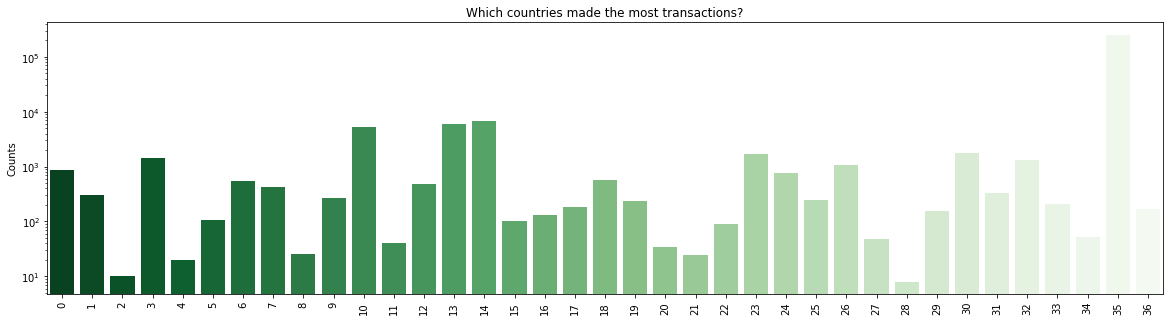

In [ ]:
country_counts = train.Country.value_counts().sort_values(ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(country_counts.index, country_counts.values, palette="Greens_r")
plt.ylabel("Counts")
plt.title("Which countries made the most transactions?");
plt.xticks(rotation=90);
plt.yscale("log")

In [ ]:
print(train.loc[train.Country==35].shape[0] )
print(train.shape[0])
train.loc[train.Country==35].shape[0] / train.shape[0] * 100


253253
284780


88.92934897113561

In [ ]:
# Creating a feature to describe whether inside or outside of country 35
train["35"] = np.where(train.Country == 35, 1, 0)


In [ ]:
train.shape

(284780, 25)

In [ ]:
test.shape

(122049, 24)

In [ ]:
test["35"] = np.where(test.Country == 35, 1, 0)


In [ ]:
train["quantity_returned"] = np.where(train.quantity_per_customer == 0, 1, 0)
test["quantity_returned"] = np.where(test.quantity_per_customer == 0, 1, 0)


In [ ]:
train_join = train.groupby('InvoiceNo')[['Quantity']].sum()
train_join.head()

,Quantity
InvoiceNo,
0,34
1,6
2,74
3,15
4,3


In [ ]:
train.CustomerID.nunique()

4339

In [ ]:
train.UnitPrice.describe()

count    284780.000000
mean          3.451216
std          78.399541
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

In [ ]:
# Different invoice numbers 
train.InvoiceNo.nunique()

20971

In [ ]:
train.InvoiceNo.describe()

count    284780.000000
mean       9955.394083
std        5551.519138
min           0.000000
25%        5069.000000
50%       10310.000000
75%       14657.000000
max       22188.000000
Name: InvoiceNo, dtype: float64

In [ ]:
train.StockCode.describe()


count    284780.000000
mean       1573.386807
std         843.604991
min           0.000000
25%         939.000000
50%        1521.000000
75%        2106.000000
max        3683.000000
Name: StockCode, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


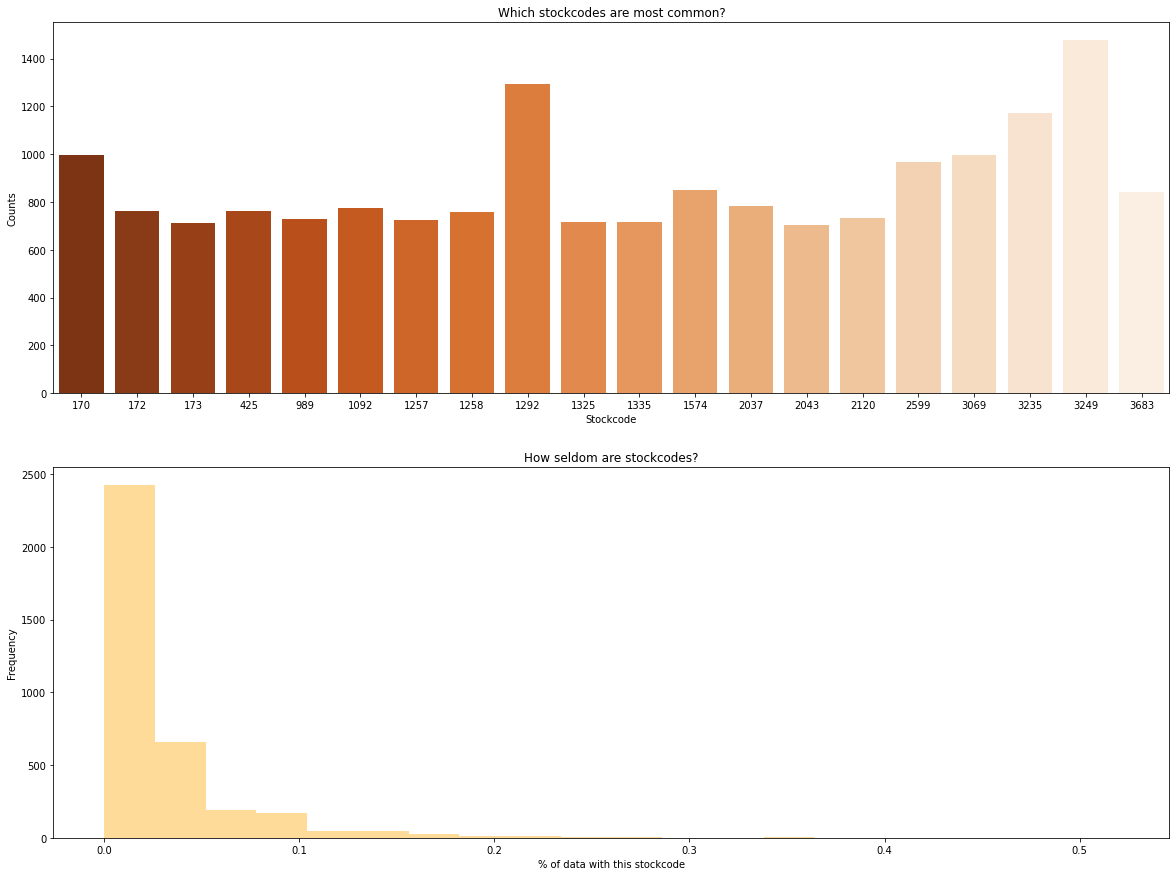

In [ ]:
# Common Stock Codes
stockcode_counts = train.StockCode.value_counts().sort_values(ascending=False)
fig, ax = plt.subplots(2,1,figsize=(20,15))
sns.barplot(stockcode_counts.iloc[0:20].index,
            stockcode_counts.iloc[0:20].values,
            ax = ax[0], palette="Oranges_r")
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("Stockcode")
ax[0].set_title("Which stockcodes are most common?");
sns.distplot(np.round(stockcode_counts/train.shape[0]*100,2),
             kde=False,
             bins=20,
             ax=ax[1], color="Orange")
ax[1].set_title("How seldom are stockcodes?")
ax[1].set_xlabel("% of data with this stockcode")
ax[1].set_ylabel("Frequency");


In [ ]:
train.Description.nunique()


3819

In [ ]:
train.Description.describe()


count    284780.000000
mean       2023.955573
std        1089.812078
min           0.000000
25%        1141.000000
50%        1987.000000
75%        2945.000000
max        3895.000000
Name: Description, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


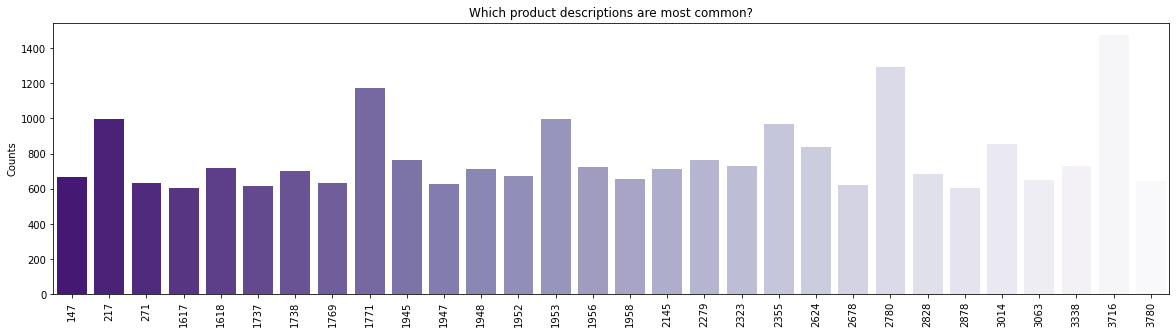

In [ ]:
description_counts = train.Description.value_counts().sort_values(ascending=False).iloc[0:30]
plt.figure(figsize=(20,5))
sns.barplot(description_counts.index, description_counts.values, palette="Purples_r")
plt.ylabel("Counts")
plt.title("Which product descriptions are most common?");
plt.xticks(rotation=90);

In [ ]:
train.CustomerID.nunique()


4339

In [ ]:
train.CustomerID.describe()


count    284780.000000
mean      15288.224278
std        1714.336529
min       12346.000000
25%       13953.000000
50%       15152.000000
75%       16794.000000
max       18287.000000
Name: CustomerID, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


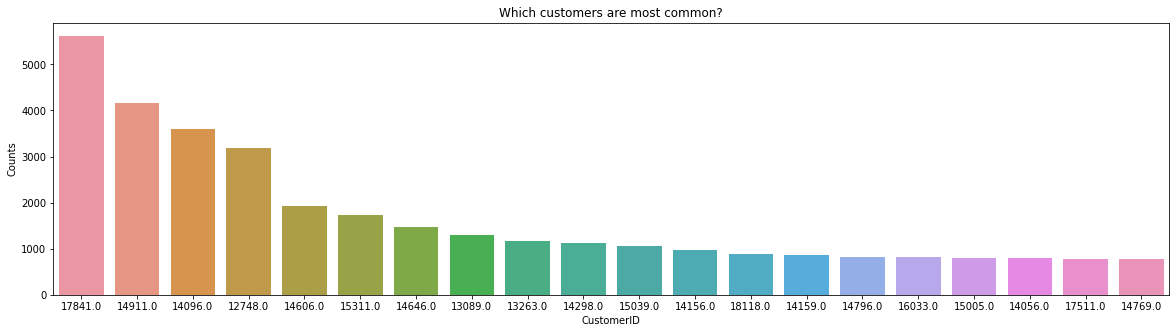

In [ ]:
customer_counts = train.CustomerID.value_counts().sort_values(ascending=False).iloc[0:20] 
plt.figure(figsize=(20,5))
sns.barplot(customer_counts.index, customer_counts.values, order=customer_counts.index)
plt.ylabel("Counts")
plt.xlabel("CustomerID")
plt.title("Which customers are most common?");
#plt.xticks(rotation=90);

In [ ]:
train.UnitPrice.describe()

count    284780.000000
mean          3.451216
std          78.399541
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

In [ ]:
train.loc[train.Quantity < 0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,day,year,quarter,day of the week,dayofweek_name,is_weekend,week_of_the_year,Dayofyear,hour,minute,Quantity_per_Stock,Quantity_per_invoice,Unique_customers_per_stock,transactions_per_stock,35,quant
20,20652,3131,1576,-36,2011-07-26 10:15:00,1.06,12431.0,0,7,26,2011,3,1,Tuesday,0,30,207,10,10:15:00,7440,-36,240.0,419,0,-1
152,22083,2224,11,-1,2011-12-01 10:41:00,4.95,15993.0,35,12,1,2011,4,3,Thursday,0,48,335,10,10:41:00,173,-3,29.0,32,1,-1
157,19796,1521,2679,-6,2011-04-26 11:19:00,2.95,12705.0,14,4,26,2011,2,1,Tuesday,0,17,116,11,11:19:00,1780,-14,185.0,327,0,-1
186,21750,2166,1760,-100,2011-11-09 11:41:00,1.79,17511.0,35,11,9,2011,4,2,Wednesday,0,45,313,11,11:41:00,6066,-1000,290.0,400,1,-1
196,21369,1014,2934,-17,2011-10-06 20:08:00,4.25,16839.0,35,10,6,2011,4,3,Thursday,0,40,279,20,20:08:00,3037,-394,327.0,454,1,-1


In [ ]:
train.loc[train.UnitPrice == 0].sort_values(by="Quantity", ascending=False).shape

(34, 18)

In [ ]:
test.loc[test.UnitPrice == 0].sort_values(by="Quantity", ascending=False).shape

(10, 7)

In [ ]:
train1 = train.loc[train.UnitPrice > 0].copy()

In [ ]:
train1.loc[train1.quantity_per_customer == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,day,year,quarter,day of the week,dayofweek_name,is_weekend,week_of_the_year,Dayofyear,transactions_per_customer,stocks_per_customer,quantity_per_customer,total_transactions_per_customer,total_weeks_per_customer,Unique_weeks_per_customer,Unique_days_per_customer,total_days_per_customer
4127,20238,1366,2407,-60,2011-06-10 15:39:00,4.95,15098.0,35,6,10,2011,2,4,Friday,0,23,161,4,2,0,4,4,1,1,4
52291,21339,1247,139,-1,2011-10-06 18:34:00,4.25,14792.0,35,10,6,2011,4,3,Thursday,0,40,279,2,2,0,4,4,1,2,4
81197,7927,1366,2405,1,2011-06-10 15:33:00,649.50,15098.0,35,6,10,2011,2,4,Friday,0,23,161,4,2,0,4,4,1,1,4
126817,7924,1366,2407,60,2011-06-10 15:22:00,4.95,15098.0,35,6,10,2011,2,4,Friday,0,23,161,4,2,0,4,4,1,1,4
140723,20237,3681,2140,-1,2011-06-10 15:31:00,38970.00,15098.0,35,6,10,2011,2,4,Friday,0,23,161,4,2,0,4,4,1,1,4
141379,1909,2001,2002,74215,2011-01-18 10:01:00,1.04,12346.0,35,1,18,2011,1,1,Tuesday,0,3,18,2,1,0,2,2,1,1,2
161153,21339,2617,632,-1,2011-10-06 18:34:00,1.95,14792.0,35,10,6,2011,4,3,Thursday,0,40,279,2,2,0,4,4,1,2,4
164002,13560,1247,139,1,2011-10-07 09:19:00,4.25,14792.0,35,10,7,2011,4,4,Friday,0,40,280,2,2,0,4,4,1,2,4
216853,13560,2617,632,1,2011-10-07 09:19:00,1.95,14792.0,35,10,7,2011,4,4,Friday,0,40,280,2,2,0,4,4,1,2,4
271013,18958,2001,2002,-74215,2011-01-18 10:17:00,1.04,12346.0,35,1,18,2011,1,1,Tuesday,0,3,18,2,1,0,2,2,1,1,2


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


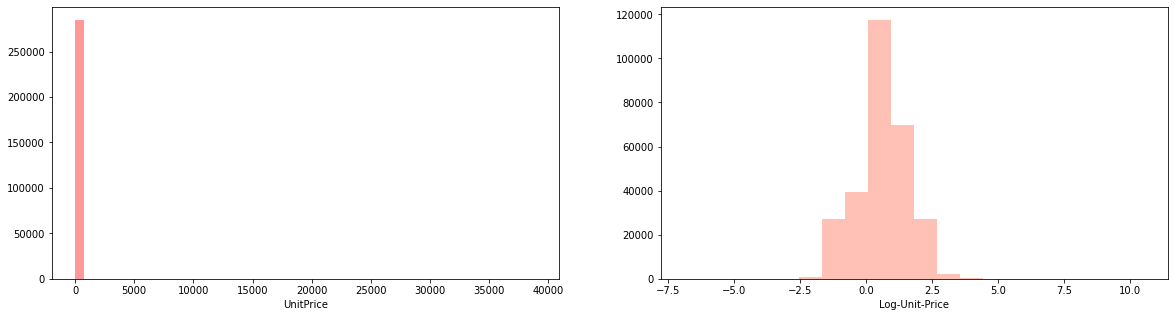

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(train1.UnitPrice, ax=ax[0], kde=False, color="red")
sns.distplot(np.log(train1.UnitPrice), ax=ax[1], bins=20, color="tomato", kde=False)
ax[1].set_xlabel("Log-Unit-Price");

In [ ]:
print(np.exp(-2.53))
print(np.exp(3.9))


0.07965902028589804
49.40244910553017


In [ ]:
np.quantile(train1.UnitPrice, 0.95)


8.5

In [ ]:
train1 = train1.loc[(train1.UnitPrice > 0.07) & (train1.UnitPrice < 49.402)].copy()

In [ ]:
train1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,day,year,quarter,day of the week,dayofweek_name,is_weekend,week_of_the_year,Dayofyear,transactions_per_customer,stocks_per_customer,quantity_per_customer,total_transactions_per_customer,total_weeks_per_customer,Unique_weeks_per_customer,Unique_days_per_customer,total_days_per_customer
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,5,6,2011,2,4,Friday,0,18,126,28,301,2970,791,791,22,24,791
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,5,11,2011,2,2,Wednesday,0,19,131,38,146,9960,394,394,25,33,394
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,11,20,2011,4,6,Sunday,1,46,324,20,170,1787,307,307,15,15,307
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,11,22,2011,4,1,Tuesday,0,47,326,4,105,323,128,128,3,3,128
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,5,6,2011,2,4,Friday,0,18,126,2,86,1042,95,95,2,2,95


In [ ]:
train.Quantity.describe()

count    284780.000000
mean         12.028468
std         295.111588
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [ ]:
train.loc[train.Quantity < 0].shape

(6167, 18)

In [ ]:
train = train.loc[train.Quantity > 0]

In [ ]:
test.loc[test.Quantity < 0].shape

(2738, 7)

In [ ]:
train["quant"] = np.where(train.Quantity >0, 1, -1)

In [ ]:
train1_combo.head()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,month,day,year,quarter,day of the week,is_weekend,week_of_the_year,Dayofyear,Country__0,Country__1,Country__2,Country__3,Country__4,Country__5,Country__6,Country__7,Country__8,Country__9,Country__10,Country__11,Country__12,Country__13,Country__14,Country__15,Country__16,Country__17,Country__18,Country__19,Country__20,Country__21,Country__22,Country__23,Country__24,Country__25,Country__26,Country__27,Country__28,Country__29,Country__30,Country__31,Country__32,Country__33,Country__34,Country__35,Country__36,Quantity_per_Stock,Quantity_per_invoice,quant
0,6141,1583,144,3,14056.0,5,6,2011,2,4,0,18,126,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1829,125,1
1,6349,1300,3682,6,13098.0,5,11,2011,2,2,0,19,131,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1341,623,1
2,16783,2178,1939,4,15044.0,11,20,2011,4,6,1,46,324,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1434,426,1
3,16971,2115,2983,1,15525.0,11,22,2011,4,1,0,47,326,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4962,135,1
4,6080,1210,2886,12,13952.0,5,6,2011,2,4,0,18,126,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1101,341,1


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


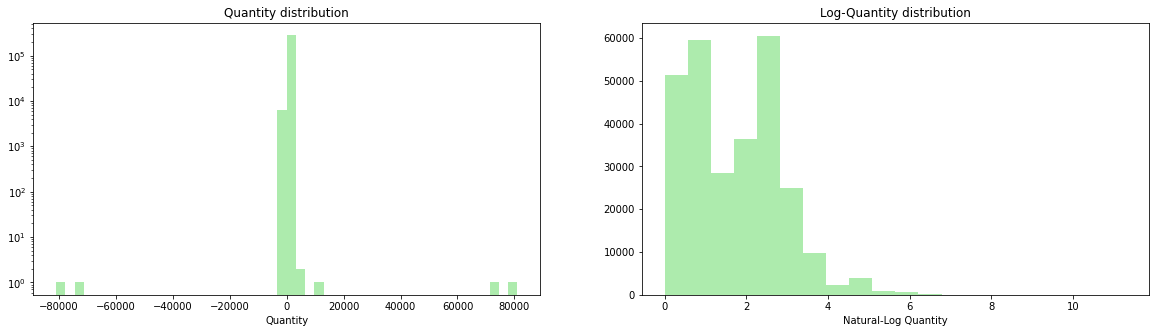

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(train.Quantity, ax=ax[0], kde=False, color="limegreen");
sns.distplot(np.log(train.Quantity), ax=ax[1], bins=20, kde=False, color="limegreen");
ax[0].set_title("Quantity distribution")
ax[0].set_yscale("log")
ax[1].set_title("Log-Quantity distribution")
ax[1].set_xlabel("Natural-Log Quantity");

In [ ]:
print(np.exp(4))


54.598150033144236


In [ ]:
np.quantile(train.Quantity, 0.95)

36.0

In [ ]:
train1 = train1.loc[train1.Quantity < 55].copy()

In [ ]:
train.loc[train.quantity_per_customer == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,day,year,quarter,day of the week,dayofweek_name,is_weekend,week_of_the_year,Dayofyear,total_days_per_stockcode,transactions_per_customer,stocks_per_customer,quantity_per_customer,total_transactions_per_customer,Unique_weeks_per_customer,Unique_days_per_customer,35,quantity_returned
4127,20238,1366,2407,-60,2011-06-10 15:39:00,4.95,15098.0,35,6,10,2011,2,4,Friday,0,23,161,173,4,2,0,4,1,1,1,1
52291,21339,1247,139,-1,2011-10-06 18:34:00,4.25,14792.0,35,10,6,2011,4,3,Thursday,0,40,279,179,2,2,0,4,1,2,1,1
81197,7927,1366,2405,1,2011-06-10 15:33:00,649.50,15098.0,35,6,10,2011,2,4,Friday,0,23,161,173,4,2,0,4,1,1,1,1
126817,7924,1366,2407,60,2011-06-10 15:22:00,4.95,15098.0,35,6,10,2011,2,4,Friday,0,23,161,173,4,2,0,4,1,1,1,1
140723,20237,3681,2140,-1,2011-06-10 15:31:00,38970.00,15098.0,35,6,10,2011,2,4,Friday,0,23,161,320,4,2,0,4,1,1,1,1
141379,1909,2001,2002,74215,2011-01-18 10:01:00,1.04,12346.0,35,1,18,2011,1,1,Tuesday,0,3,18,141,2,1,0,2,1,1,1,1
161153,21339,2617,632,-1,2011-10-06 18:34:00,1.95,14792.0,35,10,6,2011,4,3,Thursday,0,40,279,24,2,2,0,4,1,2,1,1
164002,13560,1247,139,1,2011-10-07 09:19:00,4.25,14792.0,35,10,7,2011,4,4,Friday,0,40,280,179,2,2,0,4,1,2,1,1
216853,13560,2617,632,1,2011-10-07 09:19:00,1.95,14792.0,35,10,7,2011,4,4,Friday,0,40,280,24,2,2,0,4,1,2,1,1
271013,18958,2001,2002,-74215,2011-01-18 10:17:00,1.04,12346.0,35,1,18,2011,1,1,Tuesday,0,3,18,141,2,1,0,2,1,1,1,1


In [ ]:
train1.loc[:, ["UnitPrice", "Quantity"]].describe()



,UnitPrice,Quantity
count,276247.000000,276247.000000
mean,2.933869,7.285299
std,3.140555,209.428141
min,0.080000,-80995.000000
25%,1.250000,2.000000
50%,1.950000,4.000000
75%,3.750000,12.000000
max,48.000000,54.000000


In [ ]:
print(train.shape)
print(train1.shape)

(284780, 19)
(284780, 9)


In [ ]:
train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,day,year,quarter,day of the week,dayofweek_name,is_weekend,week_of_the_year,Dayofyear,total_days_per_stockcode,transactions_per_customer,stocks_per_customer,quantity_per_customer,total_transactions_per_customer,Unique_weeks_per_customer,Unique_days_per_customer,35,quantity_returned
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,5,6,2011,2,4,Friday,0,18,126,331,28,301,2970,791,22,24,1,0
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,5,11,2011,2,2,Wednesday,0,19,131,194,38,146,9960,394,25,33,1,0
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,11,20,2011,4,6,Sunday,1,46,324,317,20,170,1787,307,15,15,1,0
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,11,22,2011,4,1,Tuesday,0,47,326,328,4,105,323,128,3,3,1,0
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,5,6,2011,2,4,Friday,0,18,126,114,2,86,1042,95,2,2,1,0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


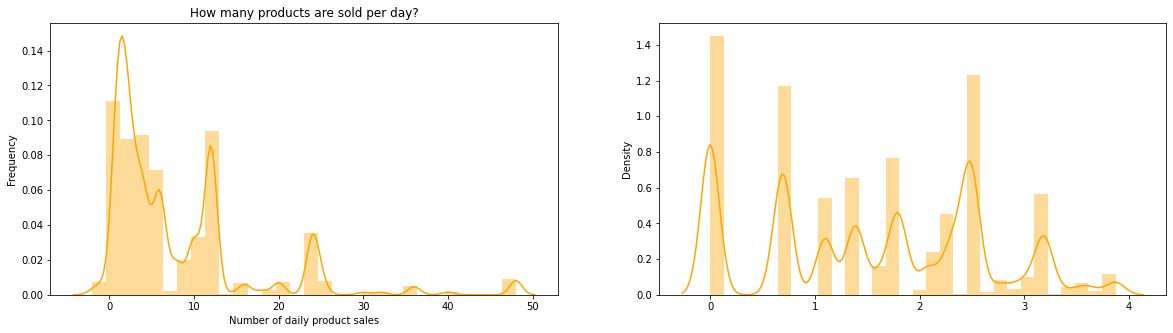

In [ ]:
# Remaining distributions of daily quantities
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(train1.Quantity.values, kde=True, ax=ax[0], color="Orange", bins=30);
sns.distplot(np.log(train1.Quantity.values), kde=True, ax=ax[1], color="Orange", bins=30);
ax[0].set_xlabel("Number of daily product sales");
ax[0].set_ylabel("Frequency");
ax[0].set_title("How many products are sold per day?");


In [ ]:
train1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,day,year,quarter,day of the week,dayofweek_name,is_weekend,week_of_the_year,Dayofyear,transactions_per_customer,stocks_per_customer,quantity_per_customer,total_transactions_per_customer,total_weeks_per_customer,Unique_weeks_per_customer,Unique_days_per_customer,total_days_per_customer
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,5,6,2011,2,4,Friday,0,18,126,28,301,2970,791,791,22,24,791
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,5,11,2011,2,2,Wednesday,0,19,131,38,146,9960,394,394,25,33,394
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,11,20,2011,4,6,Sunday,1,46,324,20,170,1787,307,307,15,15,307
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,11,22,2011,4,1,Tuesday,0,47,326,4,105,323,128,128,3,3,128
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,5,6,2011,2,4,Friday,0,18,126,2,86,1042,95,95,2,2,95


In [ ]:
train =train.drop(["Year:_2010","Year:_2011"],axis =1)

In [ ]:
train.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,month,day,year,quarter,day of the week,is_weekend,week_of_the_year,35,year_2010,year_2011
0,6141,1583,144,3,3.75,14056.0,35,5,6,2011,2,4,0,18,1,0,1
1,6349,1300,3682,6,1.95,13098.0,35,5,11,2011,2,2,0,19,1,0,1
2,16783,2178,1939,4,5.95,15044.0,35,11,20,2011,4,6,1,46,1,0,1
3,16971,2115,2983,1,0.83,15525.0,35,11,22,2011,4,1,0,47,1,0,1
4,6080,1210,2886,12,1.65,13952.0,35,5,6,2011,2,4,0,18,1,0,1


In [ ]:
train.shape

(284780, 15)

In [ ]:
train.year.unique()

array([2011, 2010])

In [ ]:
train.year.value_counts()

2011    265959
2010     18821
Name: year, dtype: int64

In [ ]:
week = train.week_of_the_year.max() - 2
print(week)

49


## Feature Engineering

In [ ]:
# Creating Product types
week = train.week_of_the_year.max() - 2
products = pd.DataFrame(index=train.loc[train.week_of_the_year < week].StockCode.unique(), columns = ["MedianQuantities"])

# products["MedianPrice"] = train.loc[train.week_of_the_year < week].groupby("StockCode").UnitPrice.median()
products["MedianQuantities"] = train.loc[train.week_of_the_year < week].groupby("StockCode").Quantity.median()
products["Customers"] = train.loc[train.week_of_the_year < week].groupby("StockCode").CustomerID.nunique()
products["Description"] = train.loc[train.week_of_the_year < week].groupby("StockCode").Description.median()

org_cols = np.copy(products.columns.values)
products.head()


,MedianQuantities,Customers,Description
1583,4.0,189,144.0
1300,6.0,124,3682.0
2178,3.0,225,1939.0
2115,8.0,247,2983.0
1210,3.0,74,2886.0


In [ ]:
from sklearn.preprocessing import StandardScaler
X = products.values
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
 from sklearn.cluster import KMeans
 km = KMeans(n_clusters=30)
products["cluster"] = km.fit_predict(X)

train["ProductType"] = train.StockCode.map(products.cluster)
train.ProductType = train.ProductType.astype("object")
train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,day,year,quarter,day of the week,dayofweek_name,is_weekend,week_of_the_year,Dayofyear,35,quantity_negative,ProductType
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,5,6,2011,2,4,Friday,0,18,126,1,0,13
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,5,11,2011,2,2,Wednesday,0,19,131,1,0,3
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,11,20,2011,4,6,Sunday,1,46,324,1,0,16
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,11,22,2011,4,1,Tuesday,0,47,326,1,0,19
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,5,6,2011,2,4,Friday,0,18,126,1,0,8


In [ ]:
# Baseline for product types
# train["KnownStockCodeUnitPriceMedian"] = train.StockCode.map(train.groupby("StockCode").UnitPrice.median())

# known_price_iqr = train.groupby("StockCode").UnitPrice.quantile(0.75) 
# known_price_iqr -= train.groupby("StockCode").UnitPrice.quantile(0.25) 
# train["KnownStockCodeUnitPriceIQR"] = train.StockCode.map(known_price_iqr)

In [ ]:
train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,day,year,quarter,day of the week,dayofweek_name,is_weekend,week_of_the_year,Dayofyear,35
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,5,6,2011,2,4,Friday,0,18,126,1
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,5,11,2011,2,2,Wednesday,0,19,131,1
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,11,20,2011,4,6,Sunday,1,46,324,1
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,11,22,2011,4,1,Tuesday,0,47,326,1
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,5,6,2011,2,4,Friday,0,18,126,1


In [ ]:
# to_group = ["StockCode", "year", "month", "week_of_the_year", "day of the week"]

# train = train.set_index(to_group)
# train["KnownStockCodePrice_WW_median"] = train.index.map(
#     train.groupby(to_group).UnitPrice.median())
# train["KnownStockCodePrice_WW_mean"] = train.index.map(
#     train.groupby(to_group).UnitPrice.mean().apply(lambda l: np.round(l, 2)))
# train["KnownStockCodePrice_WW_std"] = train.index.map(
#     train.groupby(to_group).UnitPrice.std().apply(lambda l: np.round(l, 2)))

# train = train.reset_index()

In [ ]:
train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,day,year,quarter,day of the week,dayofweek_name,is_weekend,week_of_the_year,Dayofyear,total_days_per_stockcode,transactions_per_customer,stocks_per_customer,quantity_per_customer,total_transactions_per_customer,Unique_weeks_per_customer,Unique_days_per_customer,35,quantity_returned
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,5,6,2011,2,4,Friday,0,18,126,331,28,301,2970,791,22,24,1,0
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,5,11,2011,2,2,Wednesday,0,19,131,194,38,146,9960,394,25,33,1,0
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,11,20,2011,4,6,Sunday,1,46,324,317,20,170,1787,307,15,15,1,0
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,11,22,2011,4,1,Tuesday,0,47,326,328,4,105,323,128,3,3,1,0
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,5,6,2011,2,4,Friday,0,18,126,114,2,86,1042,95,2,2,1,0


In [ ]:
week = train.week_of_the_year.max() - 2
print("Validation after week {}".format(week))
print("Validation starts at timepoint {}".format(train[train.week_of_the_year==week].InvoiceDate.min()))

Validation after week 49
Validation starts at timepoint 2010-12-06 08:34:00


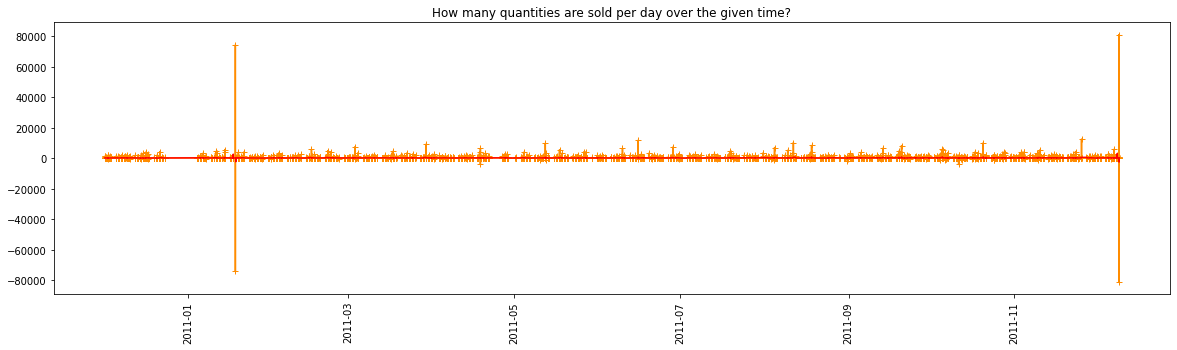

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(train.groupby("InvoiceDate").Quantity.sum(), marker='+', c="darkorange")
plt.plot(train.groupby("InvoiceDate").Quantity.sum().rolling(window=30, center=True).mean(),c="red")
plt.xticks(rotation=90);
plt.title("How many quantities are sold per day over the given time?");

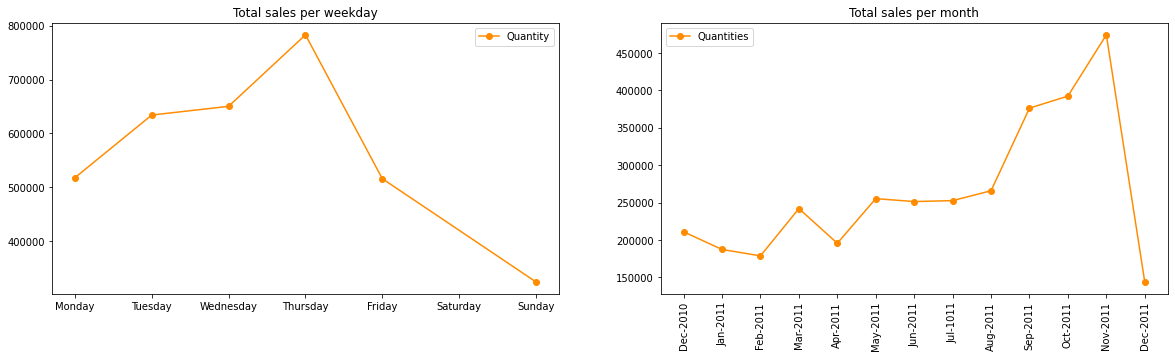

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
yearmonth = ["Dec-2010", "Jan-2011", "Feb-2011", "Mar-2011", "Apr-2011", "May-2011",
             "Jun-2011", "Jul-1011", "Aug-2011", "Sep-2011", "Oct-2011", "Nov-2011", 
             "Dec-2011"]

train.groupby("day of the week").Quantity.sum().plot(ax=ax[0], marker='o', label="Quantity", c="darkorange");
ax[0].legend();
ax[0].set_xticks(np.arange(0,7))
ax[0].set_xticklabels(weekdays);
ax[0].set_xlabel("")
ax[0].set_title("Total sales per weekday");

ax[1].plot(train.groupby(["year", "month"]).Quantity.sum().values,
    marker='o', label="Quantities", c="darkorange");
ax[1].set_xticklabels(yearmonth, rotation=90)
ax[1].set_xticks(np.arange(0, len(yearmonth)))
ax[1].legend();
ax[1].set_title("Total sales per month");

In [ ]:
train["PreChristmas"] = (train.Dayofyear <= 358) & (train.Dayofyear >= 243) 

In [ ]:
for col in ["day of the week", "month", "quarter"]:
    train = train.set_index(col)
    train[col+"Quantity_mean"] = train.loc[train.week_of_the_year < week].groupby(col).Quantity.mean()
    train[col+"Quantity_median"] = train.loc[train.week_of_the_year < week].groupby(col).Quantity.median()
    train[col+"Quantity_mean_median_diff"] = train[col+"Quantity_mean"] - train[col+"Quantity_median"]
    train[col+"Quantity_IQR"] = train.loc[
        train.week_of_the_year < week].groupby(col).Quantity.quantile(0.75) - train.loc[
        train.week_of_the_year < week].groupby(col).Quantity.quantile(0.25)
    train = train.reset_index()
train.head()

,quarter,month,day of the week,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,year,dayofweek_name,is_weekend,week_of_the_year,Dayofyear,total_days_per_stockcode,transactions_per_customer,stocks_per_customer,quantity_per_customer,total_transactions_per_customer,Unique_weeks_per_customer,Unique_days_per_customer,35,quantity_returned,PreChristmas,day of the weekQuantity_mean,day of the weekQuantity_median,day of the weekQuantity_mean_median_diff,day of the weekQuantity_IQR,monthQuantity_mean,monthQuantity_median,monthQuantity_mean_median_diff,monthQuantity_IQR,quarterQuantity_mean,quarterQuantity_median,quarterQuantity_mean_median_diff,quarterQuantity_IQR
0,2,5,4,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,6,2011,Friday,0,18,126,331,28,301,2970,791,22,24,1,0,False,13.166229,6,7.166229,10.0,12.620444,6,6.620444,10.0,12.529040,6,6.529040,10.0
1,2,5,2,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,11,2011,Wednesday,0,19,131,194,38,146,9960,394,25,33,1,0,False,12.988095,6,6.988095,10.0,12.620444,6,6.620444,10.0,12.529040,6,6.529040,10.0
2,4,11,6,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,20,2011,Sunday,1,46,324,317,20,170,1787,307,15,15,1,0,True,7.357508,3,4.357508,7.0,10.309326,4,6.309326,10.0,10.568978,4,6.568978,10.0
3,4,11,1,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,22,2011,Tuesday,0,47,326,328,4,105,323,128,3,3,1,0,True,13.400934,6,7.400934,10.0,10.309326,4,6.309326,10.0,10.568978,4,6.568978,10.0
4,2,5,4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,6,2011,Friday,0,18,126,114,2,86,1042,95,2,2,1,0,False,13.166229,6,7.166229,10.0,12.620444,6,6.620444,10.0,12.529040,6,6.529040,10.0


In [ ]:
to_group = ["StockCode", "PreChristmas"]
train = train.set_index(to_group)
train["PreChristmasMeanQuantity"] = train.loc[
    train.week_of_the_year < week].groupby(to_group).Quantity.mean().apply(lambda l: np.round(l, 1))
train["PreChristmasMedianQuantity"] = train.loc[
    train.week_of_the_year < week].groupby(to_group).Quantity.median().apply(lambda l: np.round(l, 1))
train["PreChristmasStdQuantity"] = train.loc[
    train.week_of_the_year < week].groupby(to_group).Quantity.std().apply(lambda l: np.round(l, 1))
train = train.reset_index()

In [ ]:
# Lag-Features:
for delta in range(1,4):



  to_group = ["week_of_the_year","day of the week","ProductType"]
  train = train.set_index(to_group)
        
  train["QuantityProducttypeWeekWeekdayLag_" + str(delta) + "_median"] = train.groupby(
      to_group).Quantity.median().apply(lambda l: np.round(l,1)).shift(delta)
    
  train = train.reset_index()
  train.loc[train.week_of_the_year >= (week+delta),
                "QuantityProductTypeWeekWeekdayLag_" + str(delta) + "_median"] = np.nan


In [ ]:
train["ProductType"] = train.StockCode.map(products.cluster)


In [ ]:
train["TransactionsPerProductType"] = train.ProductType.map(train.loc[train.week_of_the_year < week].groupby("ProductType").InvoiceNo.nunique())

In [ ]:
train.head()

,StockCode,PreChristmas,quarter,month,day of the week,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,year,dayofweek_name,is_weekend,week_of_the_year,Dayofyear,total_days_per_stockcode,transactions_per_customer,stocks_per_customer,quantity_per_customer,total_transactions_per_customer,Unique_weeks_per_customer,Unique_days_per_customer,35,quantity_returned,day of the weekQuantity_mean,day of the weekQuantity_median,day of the weekQuantity_mean_median_diff,day of the weekQuantity_IQR,monthQuantity_mean,monthQuantity_median,monthQuantity_mean_median_diff,monthQuantity_IQR,quarterQuantity_mean,quarterQuantity_median,quarterQuantity_mean_median_diff,quarterQuantity_IQR,PreChristmasMeanQuantity,PreChristmasMedianQuantity,PreChristmasStdQuantity
0,1583,False,2,5,4,6141,144,3,2011-05-06 16:54:00,3.75,14056.0,35,6,2011,Friday,0,18,126,331,28,301,2970,791,22,24,1,0,13.166229,6,7.166229,10.0,12.620444,6,6.620444,10.0,12.529040,6,6.529040,10.0,6.2,4.0,20.9
1,1300,False,2,5,2,6349,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,11,2011,Wednesday,0,19,131,194,38,146,9960,394,25,33,1,0,12.988095,6,6.988095,10.0,12.620444,6,6.620444,10.0,12.529040,6,6.529040,10.0,7.0,6.0,10.8
2,2178,True,4,11,6,16783,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,20,2011,Sunday,1,46,324,317,20,170,1787,307,15,15,1,0,7.357508,3,4.357508,7.0,10.309326,4,6.309326,10.0,10.568978,4,6.568978,10.0,4.5,3.0,5.9
3,2115,True,4,11,1,16971,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,22,2011,Tuesday,0,47,326,328,4,105,323,128,3,3,1,0,13.400934,6,7.400934,10.0,10.309326,4,6.309326,10.0,10.568978,4,6.568978,10.0,14.5,8.0,27.2
4,1210,False,2,5,4,6080,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,6,2011,Friday,0,18,126,114,2,86,1042,95,2,2,1,0,13.166229,6,7.166229,10.0,12.620444,6,6.620444,10.0,12.529040,6,6.529040,10.0,11.7,3.0,22.3


In [ ]:
train["TransactionsPerStockCode"] = train.StockCode.map(
    train.loc[train.week_of_the_year < week].groupby("StockCode").InvoiceNo.nunique())

In [ ]:
train.head()

,StockCode,PreChristmas,quarter,month,day of the week,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,year,dayofweek_name,is_weekend,week_of_the_year,Dayofyear,total_days_per_stockcode,transactions_per_customer,stocks_per_customer,quantity_per_customer,total_transactions_per_customer,Unique_weeks_per_customer,Unique_days_per_customer,35,quantity_returned,day of the weekQuantity_mean,day of the weekQuantity_median,day of the weekQuantity_mean_median_diff,day of the weekQuantity_IQR,monthQuantity_mean,monthQuantity_median,monthQuantity_mean_median_diff,monthQuantity_IQR,quarterQuantity_mean,quarterQuantity_median,quarterQuantity_mean_median_diff,quarterQuantity_IQR,PreChristmasMeanQuantity,PreChristmasMedianQuantity,PreChristmasStdQuantity,TransactionsPerStockCode
0,1583,False,2,5,4,6141,144,3,2011-05-06 16:54:00,3.75,14056.0,35,6,2011,Friday,0,18,126,331,28,301,2970,791,22,24,1,0,13.166229,6,7.166229,10.0,12.620444,6,6.620444,10.0,12.529040,6,6.529040,10.0,6.2,4.0,20.9,295.0
1,1300,False,2,5,2,6349,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,11,2011,Wednesday,0,19,131,194,38,146,9960,394,25,33,1,0,12.988095,6,6.988095,10.0,12.620444,6,6.620444,10.0,12.529040,6,6.529040,10.0,7.0,6.0,10.8,187.0
2,2178,True,4,11,6,16783,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,20,2011,Sunday,1,46,324,317,20,170,1787,307,15,15,1,0,7.357508,3,4.357508,7.0,10.309326,4,6.309326,10.0,10.568978,4,6.568978,10.0,4.5,3.0,5.9,294.0
3,2115,True,4,11,1,16971,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,22,2011,Tuesday,0,47,326,328,4,105,323,128,3,3,1,0,13.400934,6,7.400934,10.0,10.309326,4,6.309326,10.0,10.568978,4,6.568978,10.0,14.5,8.0,27.2,315.0
4,1210,False,2,5,4,6080,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,6,2011,Friday,0,18,126,114,2,86,1042,95,2,2,1,0,13.166229,6,7.166229,10.0,12.620444,6,6.620444,10.0,12.529040,6,6.529040,10.0,11.7,3.0,22.3,108.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 42 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   StockCode                                 284780 non-null  int64         
 1   PreChristmas                              284780 non-null  bool          
 2   quarter                                   284780 non-null  int64         
 3   month                                     284780 non-null  int64         
 4   day of the week                           284780 non-null  int64         
 5   InvoiceNo                                 284780 non-null  int64         
 6   Description                               284780 non-null  int64         
 7   Quantity                                  284780 non-null  int64         
 8   InvoiceDate                               284780 non-null  datetime64[ns]
 9   UnitPrice      

In [ ]:
train1= train[['week_of_the_year','day of the week',"StockCode",'InvoiceNo','CustomerID','Dayofyear','PreChristmasMeanQuantity','QuantityProducttypeWeekWeekdayLag_1_median','QuantityProductTypeWeekWeekdayLag_3_median']]

## Split the dataset into training and testing

In [ ]:
train.head()

,StockCode,PreChristmas,quarter,month,day of the week,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,year,dayofweek_name,is_weekend,week_of_the_year,Dayofyear,total_days_per_stockcode,transactions_per_customer,stocks_per_customer,quantity_per_customer,total_transactions_per_customer,Unique_weeks_per_customer,Unique_days_per_customer,35,quantity_returned,day of the weekQuantity_mean,day of the weekQuantity_median,day of the weekQuantity_mean_median_diff,day of the weekQuantity_IQR,monthQuantity_mean,monthQuantity_median,monthQuantity_mean_median_diff,monthQuantity_IQR,quarterQuantity_mean,quarterQuantity_median,quarterQuantity_mean_median_diff,quarterQuantity_IQR,PreChristmasMeanQuantity,PreChristmasMedianQuantity,PreChristmasStdQuantity,TransactionsPerStockCode
0,1583,False,2,5,4,6141,144,3,2011-05-06 16:54:00,3.75,14056.0,35,6,2011,Friday,0,18,126,331,28,301,2970,791,22,24,1,0,13.166229,6,7.166229,10.0,12.620444,6,6.620444,10.0,12.529040,6,6.529040,10.0,6.2,4.0,20.9,295.0
1,1300,False,2,5,2,6349,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,11,2011,Wednesday,0,19,131,194,38,146,9960,394,25,33,1,0,12.988095,6,6.988095,10.0,12.620444,6,6.620444,10.0,12.529040,6,6.529040,10.0,7.0,6.0,10.8,187.0
2,2178,True,4,11,6,16783,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,20,2011,Sunday,1,46,324,317,20,170,1787,307,15,15,1,0,7.357508,3,4.357508,7.0,10.309326,4,6.309326,10.0,10.568978,4,6.568978,10.0,4.5,3.0,5.9,294.0
3,2115,True,4,11,1,16971,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,22,2011,Tuesday,0,47,326,328,4,105,323,128,3,3,1,0,13.400934,6,7.400934,10.0,10.309326,4,6.309326,10.0,10.568978,4,6.568978,10.0,14.5,8.0,27.2,315.0
4,1210,False,2,5,4,6080,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,6,2011,Friday,0,18,126,114,2,86,1042,95,2,2,1,0,13.166229,6,7.166229,10.0,12.620444,6,6.620444,10.0,12.529040,6,6.529040,10.0,11.7,3.0,22.3,108.0


In [ ]:
train1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,day,year,quarter,day of the week,dayofweek_name,is_weekend,week_of_the_year,Dayofyear,transactions_per_customer,stocks_per_customer,quantity_per_customer,total_transactions_per_customer,total_weeks_per_customer,Unique_weeks_per_customer,Unique_days_per_customer,total_days_per_customer
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,5,6,2011,2,4,Friday,0,18,126,28,301,2970,791,791,22,24,791
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,5,11,2011,2,2,Wednesday,0,19,131,38,146,9960,394,394,25,33,394
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,11,20,2011,4,6,Sunday,1,46,324,20,170,1787,307,307,15,15,307
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,11,22,2011,4,1,Tuesday,0,47,326,4,105,323,128,128,3,3,128
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,5,6,2011,2,4,Friday,0,18,126,2,86,1042,95,95,2,2,95


In [ ]:
train =train.drop(["dayofweek_name","InvoiceDate"],axis =1)
# train1 =train1.drop(["dayofweek_name","InvoiceDate"],axis =1)

In [ ]:
# train_new = train.drop(["Quantity","year","quarter","is_weekend","Dayofyear","Quantity_per_Stock","Quantity_per_invoice","35","quant"],axis =1)

In [ ]:
train = train.fillna(0)


In [ ]:
x = train
x = x.drop(["UnitPrice"],axis =1)
y = train['UnitPrice']


In [ ]:
x = train1
x = x.drop(["UnitPrice"],axis =1)
y = train1['UnitPrice']


In [ ]:
x.head()

,StockCode,PreChristmas,quarter,month,day of the week,InvoiceNo,Description,Quantity,CustomerID,Country,day,year,is_weekend,week_of_the_year,Dayofyear,total_days_per_stockcode,transactions_per_customer,stocks_per_customer,quantity_per_customer,total_transactions_per_customer,Unique_weeks_per_customer,Unique_days_per_customer,35,quantity_returned,day of the weekQuantity_mean,day of the weekQuantity_median,day of the weekQuantity_mean_median_diff,day of the weekQuantity_IQR,monthQuantity_mean,monthQuantity_median,monthQuantity_mean_median_diff,monthQuantity_IQR,quarterQuantity_mean,quarterQuantity_median,quarterQuantity_mean_median_diff,quarterQuantity_IQR,PreChristmasMeanQuantity,PreChristmasMedianQuantity,PreChristmasStdQuantity
0,1583,False,2,5,4,6141,144,3,14056.0,35,6,2011,0,18,126,331,28,301,2970,791,22,24,1,0,13.166229,6,7.166229,10.0,12.620444,6,6.620444,10.0,12.529040,6,6.529040,10.0,6.2,4.0,20.9
1,1300,False,2,5,2,6349,3682,6,13098.0,35,11,2011,0,19,131,194,38,146,9960,394,25,33,1,0,12.988095,6,6.988095,10.0,12.620444,6,6.620444,10.0,12.529040,6,6.529040,10.0,7.0,6.0,10.8
2,2178,True,4,11,6,16783,1939,4,15044.0,35,20,2011,1,46,324,317,20,170,1787,307,15,15,1,0,7.357508,3,4.357508,7.0,10.309326,4,6.309326,10.0,10.568978,4,6.568978,10.0,4.5,3.0,5.9
3,2115,True,4,11,1,16971,2983,1,15525.0,35,22,2011,0,47,326,328,4,105,323,128,3,3,1,0,13.400934,6,7.400934,10.0,10.309326,4,6.309326,10.0,10.568978,4,6.568978,10.0,14.5,8.0,27.2
4,1210,False,2,5,4,6080,2886,12,13952.0,35,6,2011,0,18,126,114,2,86,1042,95,2,2,1,0,13.166229,6,7.166229,10.0,12.620444,6,6.620444,10.0,12.529040,6,6.529040,10.0,11.7,3.0,22.3


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 30)

In [ ]:
x_train.head()


,StockCode,PreChristmas,quarter,month,day of the week,InvoiceNo,Description,Quantity,CustomerID,Country,day,year,is_weekend,week_of_the_year,Dayofyear,total_days_per_stockcode,transactions_per_customer,stocks_per_customer,quantity_per_customer,total_transactions_per_customer,Unique_weeks_per_customer,Unique_days_per_customer,35,quantity_returned,day of the weekQuantity_mean,day of the weekQuantity_median,day of the weekQuantity_mean_median_diff,day of the weekQuantity_IQR,monthQuantity_mean,monthQuantity_median,monthQuantity_mean_median_diff,monthQuantity_IQR,quarterQuantity_mean,quarterQuantity_median,quarterQuantity_mean_median_diff,quarterQuantity_IQR,PreChristmasMeanQuantity,PreChristmasMedianQuantity,PreChristmasStdQuantity
192336,1762,False,1,3,1,3672,1648,24,16917.0,35,8,2011,0,10,67,150,1,8,228,8,1,1,1,0,13.400934,6,7.400934,10.0,12.453478,5,7.453478,10.0,12.452936,6,6.452936,10.0,9.1,10.5,12.4
254543,3144,True,3,9,0,12370,703,72,12752.0,24,19,2011,0,38,262,177,1,44,1934,44,1,1,0,0,11.231336,5,6.231336,10.0,13.168002,6,7.168002,10.0,13.295755,6,7.295755,10.0,11.1,4.0,19.5
135042,1546,False,2,4,6,5422,1039,2,17320.0,35,17,2011,1,15,107,221,3,44,519,54,3,3,1,0,7.357508,3,4.357508,7.0,12.046096,5,7.046096,10.0,12.529040,6,6.529040,10.0,3.5,2.0,4.1
172232,550,True,4,12,6,385,481,5,15889.0,35,5,2010,1,48,339,44,2,59,176,68,2,2,1,0,7.357508,3,4.357508,7.0,9.919169,4,5.919169,11.0,10.568978,4,6.568978,10.0,14.6,12.0,12.7
204288,980,True,4,11,4,17346,103,1,17920.0,35,25,2011,0,47,329,556,17,331,1636,511,14,16,1,0,13.166229,6,7.166229,10.0,10.309326,4,6.309326,10.0,10.568978,4,6.568978,10.0,12.3,12.0,23.0


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(199346, 40)
(199346,)
(85434, 40)
(85434,)


## Model Building : Linear Regression

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
prediction_reg_training = reg.predict(x_train)

In [ ]:
prediction_reg = reg.predict(x_test)

In [ ]:
prediction_reg = pd.DataFrame(prediction_reg)

In [ ]:
from sklearn.metrics import mean_squared_error 
print(mean_squared_error(y_test, prediction_reg)**0.5)

23.74151441400395


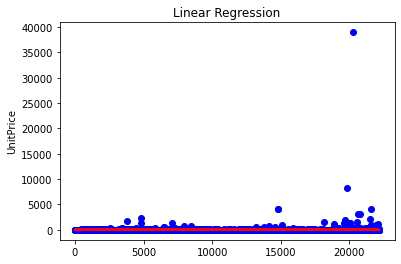

In [ ]:
# Visualising the Linear Regression results 
plt.scatter(x_train.iloc[:,0].values, y_train.values, color = 'blue')

  
plt.plot(x_train.iloc[:,0].values, prediction_reg_training, color = 'red') 
plt.title('Linear Regression') 
#plt.xlabel('Temperature') 
plt.ylabel('UnitPrice') 
  
plt.show() 

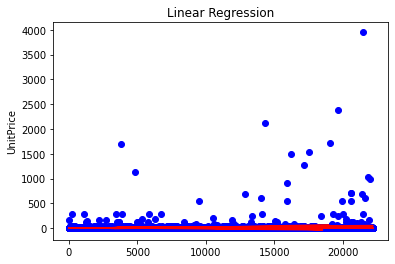

In [ ]:
# Visualising the Linear Regression results 
plt.scatter(x_test.iloc[:,0].values, y_test.values, color = 'blue')
  
plt.plot(x_test.iloc[:,0].values, prediction_reg.values, color = 'red') 
plt.title('Linear Regression') 
#plt.xlabel('Temperature') 
plt.ylabel('UnitPrice') 
  
plt.show() 

## Model Building : XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(x_train, y_train)

[15:54:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_preds = xgb.predict(x_test)
print(mean_squared_error(y_test, xgb_preds)**0.5)

21.00835073356703


Feature: 0, Score: 0.35962
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.01082
Feature: 5, Score: 0.01112
Feature: 6, Score: 0.00202
Feature: 7, Score: 0.00061
Feature: 8, Score: 0.02641
Feature: 9, Score: 0.04523
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00561
Feature: 16, Score: 0.19607
Feature: 17, Score: 0.00495
Feature: 18, Score: 0.04553
Feature: 19, Score: 0.02885
Feature: 20, Score: 0.07151
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.18131
Feature: 24, Score: 0.00001
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

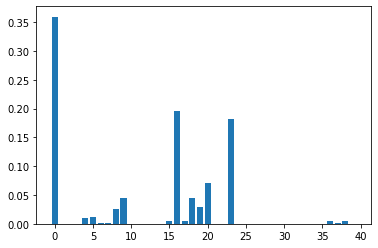

In [ ]:
importance = xgb.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Model Building : Random Forest Regression



In [ ]:
from sklearn.ensemble import RandomForestRegressor 
# create regressor object 
reg_rf = RandomForestRegressor() 

# fit the regressor with x and y data 
reg_rf.fit(x_train, y_train)
 



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
prediction_train =  reg_rf.predict(x_train)
prediction_reg_rf = reg_rf.predict(x_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, prediction_reg_rf)) 
print('Root mean square error', rmse) 

Root mean square error 17.18642238136398


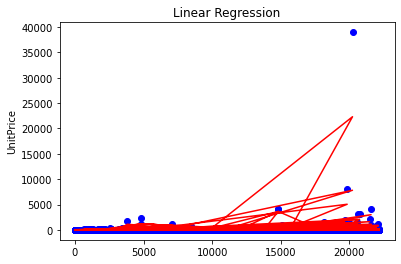

In [ ]:
# Visualising the Linear Regression results 
plt.scatter(x_train.iloc[:,0].values, y_train.values, color = 'blue')

  
plt.plot(x_train.iloc[:,0].values,prediction_train, color = 'red') 
plt.title('Linear Regression') 
#plt.xlabel('Temperature') 
plt.ylabel('UnitPrice') 
  
plt.show() 

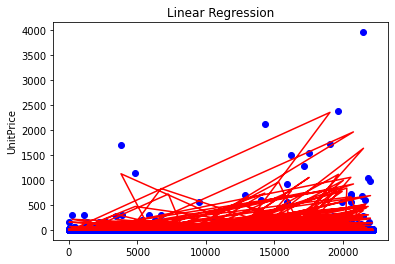

In [ ]:
# Visualising the Linear Regression results 
plt.scatter(x_test.iloc[:,0].values, y_test.values, color = 'blue')
  
plt.plot(x_test.iloc[:,0].values,prediction_reg_rf, color = 'red') 
plt.title('Linear Regression') 
#plt.xlabel('Temperature') 
plt.ylabel('UnitPrice') 
  
plt.show() 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 30)

## Model Building : Adaboost Regression

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor(criterion='friedman_mse')
ada = AdaBoostRegressor(base_estimator=dtc)
ada.fit(x_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
      

In [ ]:
ada_preds = ada.predict(x_test)
print(mean_squared_error(y_test, ada_preds)**0.5)

11.22481736213947


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199346 entries, 192336 to 48045
Data columns (total 40 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   StockCode                                 199346 non-null  int64  
 1   PreChristmas                              199346 non-null  bool   
 2   quarter                                   199346 non-null  int64  
 3   month                                     199346 non-null  int64  
 4   day of the week                           199346 non-null  int64  
 5   InvoiceNo                                 199346 non-null  int64  
 6   Description                               199346 non-null  int64  
 7   Quantity                                  199346 non-null  int64  
 8   CustomerID                                199346 non-null  float64
 9   Country                                   199346 non-null  int64  
 10  day             

Feature: 0, Score: 0.01463
Feature: 1, Score: 0.00001
Feature: 2, Score: 0.00030
Feature: 3, Score: 0.00006
Feature: 4, Score: 0.00060
Feature: 5, Score: 0.28086
Feature: 6, Score: 0.00099
Feature: 7, Score: 0.00061
Feature: 8, Score: 0.02671
Feature: 9, Score: 0.00227
Feature: 10, Score: 0.00843
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00012
Feature: 14, Score: 0.00068
Feature: 15, Score: 0.00574
Feature: 16, Score: 0.04066
Feature: 17, Score: 0.01676
Feature: 18, Score: 0.00890
Feature: 19, Score: 0.00064
Feature: 20, Score: 0.00098
Feature: 21, Score: 0.24357
Feature: 22, Score: 0.00057
Feature: 23, Score: 0.11713
Feature: 24, Score: 0.00172
Feature: 25, Score: 0.00125
Feature: 26, Score: 0.00068
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00070
Feature: 29, Score: 0.00004
Feature: 30, Score: 0.00318
Feature: 31, Score: 0.00001
Feature: 32, Score: 0.00016
Feature: 33, Score: 0.00084
Feature: 34, Score: 0.00030
Feature: 35, Score: 0.00000
Fe

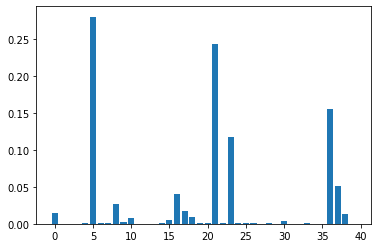

In [ ]:
importance = ada.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()



In [ ]:
x_train.head()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country,month,day,year,quarter,day of the week,is_weekend,week_of_the_year,Dayofyear,transactions_per_customer,stocks_per_customer,quantity_per_customer,total_transactions_per_customer,total_weeks_per_customer,Unique_weeks_per_customer,Unique_days_per_customer,total_days_per_customer,35,quant
192336,3672,1762,1648,24,16917.0,35,3,8,2011,1,1,0,10,67,1,8,228,8,8,1,1,8,1,1
254543,12370,3144,703,72,12752.0,24,9,19,2011,3,0,0,38,262,1,44,1934,44,44,1,1,44,0,1
135042,5422,1546,1039,2,17320.0,35,4,17,2011,2,6,1,15,107,3,44,519,54,54,3,3,54,1,1
172232,385,550,481,5,15889.0,35,12,5,2010,4,6,1,48,339,2,59,176,68,68,2,2,68,1,1
204288,17346,980,103,1,17920.0,35,11,25,2011,4,4,0,47,329,17,331,1636,511,511,14,16,511,1,1


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 }

Ada = RandomizedSearchCV(AdaBoostRegressor(DecisionTreeRegressor(criterion='friedman_mse')),
 param_distributions = param_dist,
 cv=3,
 n_iter = 10,
 n_jobs=-1)

Ada.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                                    criterion='friedman_mse',
                                                                                    max_depth=None,
                                                                                    max_features=None,
                                                                                    max_leaf_nodes=None,
                                                                                    min_impurity_decrease=0.0,
                                                                                    min_impurity_split=None,
                                                                                    min_samples_leaf=1,
                                                                                    min_samples_split=2,
            

In [ ]:
Ada.best_params_


{'learning_rate': 0.05, 'n_estimators': 50}

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 35)

In [ ]:
import lightgbm as lgb
gbm = lgb.LGBMRegressor()
gbm.fit(x_train,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
lgb_preds = gbm.predict(x_test)
print(mean_squared_error(y_test, lgb_preds)**0.5)

136.61300397997383


In [ ]:
actual = pd.read_csv("/content/Actual_revenue.csv")

In [ ]:
actual.head()

,InvoiceNo,Description,Quantity,UnitPrice,Country,Actual_UnitPrice
0,26666,3890,0,3.10,70,0.20
1,29555,3526,0,3.87,70,0.29
2,33426,7102,0,23.70,70,1.80
3,54719,7080,0,7.74,140,0.58
4,25322,5358,0,5.50,70,0.40


# Test Data

In [ ]:
test = pd.read_csv('/content/Test.csv')
test.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35


In [ ]:
test.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country,month,day,year,quarter,day of the week,dayofweek_name,is_weekend,week_of_the_year,Dayofyear,total_days_per_stockcode,transactions_per_customer,stocks_per_customer,quantity_per_customer,total_transactions_per_customer,Unique_weeks_per_customer,Unique_days_per_customer,35,quantity_returned
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35,2,22,2011,1,1,Tuesday,0,8,53,14,22,124,830,151,16,19,1,0
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35,12,8,2010,4,2,Wednesday,0,49,342,17,3,43,98,45,2,2,1,0
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35,10,25,2011,4,1,Tuesday,0,43,298,99,1,4,108,4,1,1,1,0
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35,6,27,2011,2,0,Monday,0,26,178,156,22,251,1088,342,17,18,1,0
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35,11,6,2011,4,6,Sunday,1,44,310,146,10,58,202,66,6,7,1,0


In [ ]:
test['InvoiceDate']= pd.to_datetime(test['InvoiceDate']) 
test['month'] = test['InvoiceDate'].dt.month
test['day'] = test['InvoiceDate'].dt.day
test['year'] = test['InvoiceDate'].dt.year
test['quarter'] = test['InvoiceDate'].dt.quarter
test['day of the week'] = test['InvoiceDate'].dt.dayofweek # Monday = 0 & Sunday = 6
test['dayofweek_name'] = test['InvoiceDate'].dt.day_name()
test['is_weekend'] = np.where(test['dayofweek_name'].isin(['Sunday','Saturday']),1,0)
test["week_of_the_year"] =  test['InvoiceDate'].dt.weekofyear
test['Dayofyear'] = test['InvoiceDate'].dt.dayofyear


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


In [ ]:
test.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country,month,day,year,quarter,day of the week,dayofweek_name,is_weekend,week_of_the_year,Dayofyear,total_days_per_stockcode,transactions_per_customer,stocks_per_customer,quantity_per_customer,total_transactions_per_customer,Unique_weeks_per_customer,Unique_days_per_customer,35,quantity_returned
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35,2,22,2011,1,1,Tuesday,0,8,53,14,22,124,830,151,16,19,1,0
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35,12,8,2010,4,2,Wednesday,0,49,342,17,3,43,98,45,2,2,1,0
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35,10,25,2011,4,1,Tuesday,0,43,298,99,1,4,108,4,1,1,1,0
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35,6,27,2011,2,0,Monday,0,26,178,156,22,251,1088,342,17,18,1,0
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35,11,6,2011,4,6,Sunday,1,44,310,146,10,58,202,66,6,7,1,0


In [ ]:
# Creating a feature to describe whether inside or outside of country 35
test["35"] = np.where(test.Country == 35, 1, 0)
test["quant"] = np.where(test.Quantity > 0, 1, -1)

In [ ]:
# Creating Product types
week = test.week_of_the_year.max() - 2
products = pd.DataFrame(index=test.loc[test.week_of_the_year < week].StockCode.unique(), columns = ["MedianQuantities"])

# products["MedianPrice"] = train.loc[train.week_of_the_year < week].groupby("StockCode").UnitPrice.median()
products["MedianQuantities"] = test.loc[test.week_of_the_year < week].groupby("StockCode").Quantity.median()
products["Customers"] = test.loc[test.week_of_the_year < week].groupby("StockCode").CustomerID.nunique()
products["Description"] = test.loc[test.week_of_the_year < week].groupby("StockCode").Description.median()

org_cols = np.copy(products.columns.values)
products.head()

,MedianQuantities,Customers,Description
1709,6.0,14,1079.0
604,4.0,67,694.0
1478,12.0,123,3473.0
3216,2.0,106,871.0
1817,9.0,48,697.0


In [ ]:
from sklearn.preprocessing import StandardScaler
X = products.values
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=30)
products["cluster"] = km.fit_predict(X)

test["ProductType"] = test.StockCode.map(products.cluster)
test.ProductType = test.ProductType.astype("object")
test.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country,month,day,year,quarter,day of the week,dayofweek_name,is_weekend,week_of_the_year,Dayofyear,35,quantity_negative,ProductType
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35,2,22,2011,1,1,Tuesday,0,8,53,1,0,16
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35,12,8,2010,4,2,Wednesday,0,49,342,1,0,1
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35,10,25,2011,4,1,Tuesday,0,43,298,1,0,21
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35,6,27,2011,2,0,Monday,0,26,178,1,0,2
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35,11,6,2011,4,6,Sunday,1,44,310,1,0,24


In [ ]:
test["PreChristmas"] = (test.Dayofyear <= 358) & (test.Dayofyear >= 243) 

In [ ]:
for col in ["day of the week", "month", "quarter"]:
    test = test.set_index(col)
    test[col+"Quantity_mean"] = test.loc[test.week_of_the_year < week].groupby(col).Quantity.mean()
    test[col+"Quantity_median"] = test.loc[test.week_of_the_year < week].groupby(col).Quantity.median()
    test[col+"Quantity_mean_median_diff"] = test[col+"Quantity_mean"] - test[col+"Quantity_median"]
    test[col+"Quantity_IQR"] = test.loc[
        test.week_of_the_year < week].groupby(col).Quantity.quantile(0.75) - test.loc[
        test.week_of_the_year < week].groupby(col).Quantity.quantile(0.25)
    test = test.reset_index()
test.head()

,quarter,month,day of the week,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country,day,year,dayofweek_name,is_weekend,week_of_the_year,Dayofyear,total_days_per_stockcode,transactions_per_customer,stocks_per_customer,quantity_per_customer,total_transactions_per_customer,Unique_weeks_per_customer,Unique_days_per_customer,35,quantity_returned,PreChristmas,day of the weekQuantity_mean,day of the weekQuantity_median,day of the weekQuantity_mean_median_diff,day of the weekQuantity_IQR,monthQuantity_mean,monthQuantity_median,monthQuantity_mean_median_diff,monthQuantity_IQR,quarterQuantity_mean,quarterQuantity_median,quarterQuantity_mean_median_diff,quarterQuantity_IQR
0,1,2,1,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35,22,2011,Tuesday,0,8,53,14,22,124,830,151,16,19,1,0,False,13.655154,6,7.655154,10.0,13.459092,6,7.459092,10.0,12.608347,6,6.608347,10.0
1,4,12,2,617,510,3457,1,2010-12-08 12:46:00,17341.0,35,8,2010,Wednesday,0,49,342,17,3,43,98,45,2,2,1,0,True,13.764454,6,7.764454,10.0,8.707583,4,4.707583,11.0,10.472944,4,6.472944,10.0
2,4,10,1,14653,604,694,36,2011-10-25 13:53:00,15158.0,35,25,2011,Tuesday,0,43,298,99,1,4,108,4,1,1,1,0,True,13.655154,6,7.655154,10.0,11.584809,4,7.584809,10.0,10.472944,4,6.472944,10.0
3,2,6,0,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35,27,2011,Monday,0,26,178,156,22,251,1088,342,17,18,1,0,False,11.168391,5,6.168391,10.0,12.792444,6,6.792444,10.0,12.602735,6,6.602735,10.0
4,4,11,6,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35,6,2011,Sunday,1,44,310,146,10,58,202,66,6,7,1,0,True,7.247342,3,4.247342,6.0,9.984784,4,5.984784,11.0,10.472944,4,6.472944,10.0


In [ ]:
to_group = ["StockCode", "PreChristmas"]
test = test.set_index(to_group)
test["PreChristmasMeanQuantity"] = test.loc[
    test.week_of_the_year < week].groupby(to_group).Quantity.mean().apply(lambda l: np.round(l, 1))
test["PreChristmasMedianQuantity"] = test.loc[
    test.week_of_the_year < week].groupby(to_group).Quantity.median().apply(lambda l: np.round(l, 1))
test["PreChristmasStdQuantity"] = test.loc[
    test.week_of_the_year < week].groupby(to_group).Quantity.std().apply(lambda l: np.round(l, 1))
test = test.reset_index()

In [ ]:
# Lag-Features:
for delta in range(1,4):



  to_group = ["week_of_the_year","day of the week","ProductType"]
  test = test.set_index(to_group)
        
  test["QuantityProducttypeWeekWeekdayLag_" + str(delta) + "_median"] = test.groupby(
      to_group).Quantity.median().apply(lambda l: np.round(l,1)).shift(delta)
    
  test = test.reset_index()
  test.loc[test.week_of_the_year >= (week+delta),
                "QuantityProductTypeWeekWeekdayLag_" + str(delta) + "_median"] = np.nan

In [ ]:
test["ProductType"] = test.StockCode.map(products.cluster)
test["TransactionsPerProductType"] = test.ProductType.map(test.loc[test.week_of_the_year < week].groupby("ProductType").InvoiceNo.nunique())

In [ ]:
test["TransactionsPerStockCode"] = test.StockCode.map(
    test.loc[test.week_of_the_year < week].groupby("StockCode").InvoiceNo.nunique())

In [ ]:
# Quantity of each stock
test_join = test.groupby('StockCode')[['Quantity']].sum()
test_join = test_join.reset_index()
test_join.head()

,StockCode,Quantity
0,0,249
1,1,101
2,2,64
3,4,4
4,5,5


In [ ]:
test = test.merge(test_join, how='left', on='StockCode')
test = test.rename(columns={'Quantity_x' : 'Quantity', 'Quantity_y' : 'Quantity_per_Stock'})


In [ ]:
# Total Quantity per invoice
test_in = test.groupby('InvoiceNo')[['Quantity']].sum()
test_in = test_in.reset_index()
test_in.head()

,InvoiceNo,Quantity
0,0,6
1,1,6
2,2,9
3,5,36
4,6,80


In [ ]:
test = test.merge(test_in, how='left', on='InvoiceNo')
test = test.rename(columns={'Quantity_x' : 'Quantity', 'Quantity_y' : 'Quantity_per_invoice'})


In [ ]:
test["quant"] = np.where(test.Quantity > 0, 1, -1)

In [ ]:
# Unique customers per stock
test_cust_per_stock = test.groupby(by='StockCode', as_index=False).agg({'CustomerID': pd.Series.nunique})
test_cust_per_stock = test_cust_per_stock.rename(columns = {'CustomerID':'Unique_customers_per_stock'})
test = test.merge(test_cust_per_stock, how='left', on='StockCode')
test_cust_per_stock.head()

,StockCode,Unique_customers_per_stock
0,0,16.0
1,1,7.0
2,2,7.0
3,4,1.0
4,5,1.0


In [ ]:
# Unique transactions per stock
transactions_per_stock = test.groupby(by='StockCode', as_index=False).agg({'InvoiceNo': pd.Series.nunique})
transactions_per_stock = transactions_per_stock.rename(columns = {'InvoiceNo':'transactions_per_stock'})
test = test.merge(transactions_per_stock, how='left', on='StockCode')
transactions_per_stock.head()

,StockCode,transactions_per_stock
0,0,17
1,1,7
2,2,7
3,4,1
4,5,1


In [ ]:
# Total transactions per customer
total_transactions_per_customer = test.groupby('CustomerID')['InvoiceNo'].count()
total_transactions_per_customer = pd.DataFrame(total_transactions_per_customer)
total_transactions_per_customer = total_transactions_per_customer.rename(columns = {'InvoiceNo':'total_transactions_per_customer'})
test = test.merge(total_transactions_per_customer, how='left', on='CustomerID')
total_transactions_per_customer.head()


,total_transactions_per_customer
CustomerID,
12347.0,50
12348.0,9
12349.0,20
12350.0,6
12352.0,26


In [ ]:
x_train



,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country,month,day,year,quarter,day of the week,is_weekend,week_of_the_year,Dayofyear,transactions_per_customer,stocks_per_customer,quantity_per_customer,total_transactions_per_customer,total_weeks_per_customer,Unique_weeks_per_customer,Unique_days_per_customer,total_days_per_customer
261715,8260,2062,1221,24,13618.0,35,6,19,2011,2,6,1,24,170,1,9,200,9,9,1,1,9
253201,17405,1521,2679,2,13546.0,35,11,27,2011,4,6,1,47,331,3,53,242,63,63,3,3,63
155713,5536,3547,2697,2,17449.0,35,4,19,2011,2,1,0,16,109,8,141,766,195,195,7,7,195
251184,13974,2079,3025,4,15367.0,35,10,13,2011,4,3,0,41,286,5,68,766,70,70,4,4,70
114558,12822,1695,539,2,18016.0,35,9,26,2011,3,0,0,39,269,5,68,576,84,84,5,5,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123554,8259,1484,2070,2,14646.0,23,6,19,2011,2,6,1,24,170,72,605,142558,1477,1477,31,45,1477
267144,14242,770,1862,1,16910.0,35,10,18,2011,4,1,0,42,291,8,263,638,393,393,7,8,393
135983,11973,2065,3814,25,14533.0,35,9,11,2011,3,6,1,36,254,9,42,625,46,46,7,8,46
151342,14983,2394,2035,12,12597.0,30,10,30,2011,4,6,1,43,303,5,127,1382,139,139,5,5,139


In [ ]:
test.shape

(122049, 41)

In [ ]:
train.shape

(284780, 40)

In [ ]:
test = test.drop(["35"],axis =1)

In [ ]:
test.head()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,Country,month,day,year,quarter,day of the week,is_weekend,week_of_the_year,Dayofyear,transactions_per_customer,stocks_per_customer,quantity_per_customer,total_transactions_per_customer,total_weeks_per_customer,Unique_weeks_per_customer,Unique_days_per_customer,total_days_per_customer
0,3139,1709,1079,3,16161.0,35,2,22,2011,1,1,0,8,53,22,124,830,151,151,16,19,151
1,617,510,3457,1,17341.0,35,12,8,2010,4,2,0,49,342,3,43,98,45,45,2,2,45
2,14653,604,694,36,15158.0,35,10,25,2011,4,1,0,43,298,1,4,108,4,4,1,1,4
3,8634,1478,3473,2,16033.0,35,6,27,2011,2,0,0,26,178,22,251,1088,342,342,17,18,342
4,15546,3216,871,1,15351.0,35,11,6,2011,4,6,1,44,310,10,58,202,66,66,6,7,66


In [ ]:
test = test.drop(["Quantity","year","quarter","is_weekend","Dayofyear","Quantity_per_Stock","Quantity_per_invoice","35","quant"],axis =1)

In [ ]:
test.shape

(122049, 19)

In [ ]:
test1_combo.head()

,InvoiceNo,StockCode,Description,Quantity,CustomerID,month,day,year,quarter,day of the week,is_weekend,week_of_the_year,Dayofyear,Country__0,Country__1,Country__2,Country__3,Country__4,Country__5,Country__6,Country__7,Country__8,Country__9,Country__10,Country__11,Country__12,Country__13,Country__14,Country__15,Country__16,Country__17,Country__18,Country__19,Country__20,Country__21,Country__22,Country__23,Country__24,Country__25,Country__26,Country__27,Country__28,Country__29,Country__30,Country__31,Country__32,Country__33,Country__34,Country__35,Country__36,Quantity_per_Stock,Quantity_per_invoice,quant,Number of customers
0,3139,1709,1079,3,16161.0,2,22,2011,1,1,0,8,53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,102,23,1,14
1,617,510,3457,1,17341.0,12,8,2010,4,2,0,49,342,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,90,53,1,17
2,14653,604,694,36,15158.0,10,25,2011,4,1,0,43,298,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,465,108,1,99
3,8634,1478,3473,2,16033.0,6,27,2011,2,0,0,26,178,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1869,75,1,156
4,15546,3216,871,1,15351.0,11,6,2011,4,6,1,44,310,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,525,20,1,146


In [ ]:
test1_combo.shape

(122049, 54)

In [ ]:
test =test.drop(["dayofweek_name","InvoiceDate"],axis =1)
# test =test.drop(["minute"],axis =1)

In [ ]:
test.shape

(122049, 40)

In [ ]:
print(test.loc[test.Country==35].shape[0] )
print(test.shape[0])
test.loc[test.Country==35].shape[0] / test.shape[0] * 100

108625
122049


89.00113888684054

In [ ]:
test = test.fillna(0)


In [ ]:
# test= test[['week_of_the_year','day of the week',"StockCode",'InvoiceNo','CustomerID','Dayofyear','PreChristmasMeanQuantity','QuantityProducttypeWeekWeekdayLag_1_median','QuantityProductTypeWeekWeekdayLag_3_median']]

In [ ]:
test.shape

(122049, 42)

In [ ]:
pred = ada.predict(test)

In [ ]:
# pred = xgb.predict(test)

In [ ]:
pred = pd.DataFrame(pred)

In [ ]:
pred

,0
0,1.65
1,1.45
2,2.95
3,1.25
4,4.95
...,...
122044,0.83
122045,0.85
122046,0.65
122047,2.55


In [ ]:
from google.colab import files
pred.to_csv('pred_ada_23.csv') 
files.download('pred_ada_23.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>